
### **Problem Statement**
In this project, we have created an investment portfolio using Modern Portfolio Theory (MPT). This portfolio is designed to predict risk and profit by enhancing the value of a stock over a period of time.Optimized allocations across different sectors by bringing out top three best-performing stocks.

### **Sectors:**
*   Industrials Sector
*   Financials Sector
*   Materials Sector

### **Stocks choosen based on Linear Regression:**

* Industrials Sector ['FDX', 'ROL', 'PAYC']
* Financials Sector ['WFC', 'CMA', 'AIG']
* Materials Sector ['CF', 'NUE', 'MOS']


#**IMPORT MODULES**

In [ ]:
# some useful modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import datetime
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
!pip install iteround
!pip install pyomo
import yahoo_fin.stock_info as si
import shutil
import sys
import os.path

  Using cached Pyomo-6.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
  Using cached ply-3.11-py2.py3-none-any.whl (49 kB)


#**DATA PREP & EDA**

We fetched data from Wikipedia to extract the tickers for each sector. We have used beautifulsoup to parse the data in the web page.

In [ ]:
#URL from which to retrieve the data
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

#Sending a get request to url and parsing through beautifulSoup
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')

#Finding the table containing the S&P 500 company data
table = soup.find('table', {'class': 'wikitable sortable'})

#Extracting all rows from the table except the header row
rows = table.find_all('tr')[1:]

#Defining a function to fetch tickers based on input sector
def fetch_tickers(input_sector):
  tickers = []
  for row in rows:
    columns = row.find_all("td")
    if len(columns) > 0:
      # Extract the relevant data from each column
      ticker = columns[0].text.strip()
      sector = columns[2].text.strip()
      if sector == input_sector:
        tickers.append(ticker)
  return tickers

#Fetching tickers for Industrials, Financials & Materials sectors
industrials_tickers = fetch_tickers("Industrials")
financials_tickers = fetch_tickers("Financials")
materials_tickers = fetch_tickers("Materials")

In [ ]:
#printing to check the tickers in each sector
print("Industrials Tickers",industrials_tickers)
print("Financials Tickers",financials_tickers)
print("Materials Tickers",materials_tickers)

Industrials Tickers ['MMM', 'AOS', 'ALLE', 'AAL', 'AME', 'ADP', 'AXON', 'BA', 'BR', 'BLDR', 'CARR', 'CAT', 'CHRW', 'CTAS', 'CPRT', 'CSX', 'CMI', 'DAY', 'DE', 'DAL', 'DOV', 'ETN', 'EMR', 'EFX', 'EXPD', 'FAST', 'FDX', 'FTV', 'GE', 'GEV', 'GNRC', 'GD', 'HON', 'HWM', 'HUBB', 'HII', 'IEX', 'ITW', 'IR', 'JBHT', 'J', 'JCI', 'LHX', 'LDOS', 'LMT', 'MAS', 'NDSN', 'NSC', 'NOC', 'ODFL', 'OTIS', 'PCAR', 'PH', 'PAYX', 'PAYC', 'PNR', 'PWR', 'RTX', 'RSG', 'RHI', 'ROK', 'ROL', 'SNA', 'LUV', 'SWK', 'TXT', 'TT', 'TDG', 'UBER', 'UNP', 'UAL', 'UPS', 'URI', 'VLTO', 'VRSK', 'WAB', 'WM', 'GWW', 'XYL']
Financials Tickers ['AFL', 'ALL', 'AXP', 'AIG', 'AMP', 'AON', 'ACGL', 'AJG', 'AIZ', 'BAC', 'BK', 'BRK.B', 'BLK', 'BX', 'BRO', 'COF', 'CBOE', 'SCHW', 'CB', 'CINF', 'C', 'CFG', 'CME', 'CMA', 'CPAY', 'DFS', 'EG', 'FDS', 'FIS', 'FITB', 'FI', 'BEN', 'GPN', 'GL', 'GS', 'HIG', 'HBAN', 'ICE', 'IVZ', 'JKHY', 'JPM', 'KEY', 'L', 'MTB', 'MKTX', 'MMC', 'MA', 'MET', 'MCO', 'MS', 'MSCI', 'NDAQ', 'NTRS', 'PYPL', 'PNC', 'PFG', '

Utilizing Yahoo Finance to gather historical price data for the period from January 1, 2017, to December 31, 2022.

In [ ]:
#Defining the start and end dates for fetching historical data
start_date = datetime.datetime.strptime("01-01-2017", "%d-%m-%Y")
end_date = datetime.datetime.strptime("31-12-2022", "%d-%m-%Y")

#Function to get historical prices for a list of tickers that are generated above
def get_prices(tickers_list):
  prices = {}
  tickers_to_remove = []
  for ticker in tickers_list:
     #Handling Exception: If the ticker is not found
    try:
      prices[ticker] = si.get_data(ticker, start_date='01/01/2017', end_date='12/31/2022', interval='1d')
    except Exception as e:
      print(ticker)
      tickers_to_remove.append(ticker)


  #Removing tickers outside the loop
  for ticker in tickers_to_remove:
    tickers_list.remove(ticker)
  return prices, tickers_list

#Fetching historical prices for Industrials, Financials & Materials sector tickers
ind_prices, industrials_tickers = get_prices(industrials_tickers)
fin_prices, financials_tickers = get_prices(financials_tickers)
mat_prices, materials_tickers = get_prices(materials_tickers)

GEV
VLTO
BRK.B


 Created DataFrames containing historical, adjusted Close Prices for companies within the Industrials, Financials, and Materials sectors.

In [ ]:
#creating dataframe for industrial sector
ind_data = pd.DataFrame(ind_prices['MMM']['adjclose']).rename(columns = {"adjclose":"MMM"})
# combine all the tickers (all the rest of the samples)
for i in industrials_tickers[1:]:
  ind_data[i] = pd.DataFrame(ind_prices[i]['adjclose'])

#creating dataframe for financial sector
fin_data = pd.DataFrame(fin_prices['AFL']['adjclose']).rename(columns = {"adjclose":"AFL"})
#combining all the tickers (all the rest of the samples)
for i in financials_tickers[1:]:
  fin_data[i] = pd.DataFrame(fin_prices[i]['adjclose'])

#creating dataframe for materials sector
mat_data = pd.DataFrame(mat_prices['APD']['adjclose']).rename(columns = {"adjclose":"APD"})
#combining all the tickers (all the rest of the samples)
for i in materials_tickers[1:]:
  mat_data[i] = pd.DataFrame(mat_prices[i]['adjclose'])

#Reseting the index of each DataFrame and rename the 'index' column to 'Date
ind_data = ind_data.reset_index().rename(columns={'index': 'Date'})
fin_data = fin_data.reset_index().rename(columns={'index': 'Date'})
mat_data = mat_data.reset_index().rename(columns={'index': 'Date'})

#checking the materials data
mat_data.head()

,Date,APD,ALB,AMCR,AVY,BALL,CE,CF,CTVA,DOW,...,MLM,MOS,NEM,NUE,PKG,PPG,SHW,STLD,VMC,WRK
0,2017-01-03,120.392776,80.590126,7.716978,61.737934,35.217239,68.087074,26.194365,NaN,NaN,...,210.890289,26.754574,28.209150,50.317711,68.231583,84.093193,85.660248,30.926756,116.672134,40.928520
1,2017-01-04,121.442268,83.015594,7.716978,63.498386,35.751892,69.208862,27.156000,NaN,NaN,...,213.751495,27.914268,28.477962,51.702057,69.331337,85.876556,86.240578,32.267696,119.620781,41.543793
2,2017-01-05,120.241699,82.731873,7.716978,62.873417,35.733303,69.148926,27.164217,NaN,NaN,...,213.902634,27.968626,29.789455,51.406616,68.496475,84.419823,86.171921,32.447048,119.293167,41.735580
3,2017-01-06,121.198799,83.116295,7.716978,63.727238,35.891373,69.388718,27.509422,NaN,NaN,...,207.594681,27.905207,28.852678,50.891720,69.997566,84.393349,87.048691,31.405058,115.885849,41.943333
4,2017-01-09,122.835907,82.814247,7.716978,63.868069,35.324181,68.986221,27.756002,NaN,NaN,...,207.141434,27.823656,28.803806,50.343037,70.455124,85.064331,86.976936,30.832802,114.874870,41.711609


## **Data Cleaning**

Cleaning the data for each sector and removing the tickers column that have missing data for more than a year.

### Industrial data

In [ ]:
#checking the industrial data - 1510 rows and 78 columns(tickers)
ind_data

,Date,MMM,AOS,ALLE,AAL,AME,ADP,AXON,BA,BR,...,UBER,UNP,UAL,UPS,URI,VRSK,WAB,WM,GWW,XYL
0,2017-01-03,108.135048,42.084835,59.528278,44.741230,46.899178,88.806755,24.580000,145.533691,58.244545,...,NaN,87.507088,72.709999,91.099037,107.520859,78.587982,80.349129,61.659454,207.655716,45.438732
1,2017-01-04,108.299065,42.456959,60.659969,45.127758,47.461365,88.944054,24.850000,147.063461,58.633244,...,NaN,88.036301,73.019997,91.122803,108.071686,79.206482,81.774033,61.484596,209.320831,46.115963
2,2017-01-05,107.928566,42.262035,60.991196,44.345039,46.861053,88.412094,24.680000,147.146881,58.332882,...,NaN,87.174194,70.930000,91.170288,108.347115,78.916573,80.215225,61.720680,205.715942,45.694984
3,2017-01-06,108.244392,42.279758,60.623169,44.654263,47.709091,88.472137,24.549999,147.508484,58.571404,...,NaN,88.079002,71.370003,91.352356,107.589706,79.612389,80.865547,61.370934,205.042816,45.374668
4,2017-01-09,107.661362,41.996246,60.190716,45.494972,47.289837,87.922997,24.270000,146.785309,58.438881,...,NaN,87.421761,71.279999,90.853630,104.422417,78.984230,80.387375,61.012440,204.024307,45.182480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2022-12-23,91.802177,55.652184,102.976044,12.710000,138.235764,234.232529,168.979996,189.059998,131.519073,...,24.639999,203.695129,38.389999,168.352219,349.405914,174.234848,99.697372,155.869568,558.162598,108.006187
1506,2022-12-27,91.863297,56.405296,103.907486,12.530000,138.979614,234.320038,166.250000,189.399994,132.487259,...,24.400000,204.092987,38.200001,168.276123,352.809235,174.185242,100.044617,156.153458,558.389771,108.980637
1507,2022-12-28,90.388535,55.525040,102.279945,12.320000,137.224121,231.228577,165.100006,188.380005,130.433517,...,24.590000,200.745132,37.290001,165.118515,346.120575,172.865631,98.576294,154.068161,550.221375,107.228600
1508,2022-12-29,92.130737,56.395519,104.652611,12.700000,139.217621,233.921432,165.580002,188.910004,133.651093,...,24.910000,203.025558,37.919998,167.153870,350.379669,176.665665,99.578323,155.536682,555.317993,109.886177


In [ ]:
#checking the total null values in the data set
ind_data.isna().sum().sum()

2625

The data has 2625 null values in the industrial sector data

We found that some tickers have no historical data for over a year which being the reason for the above null values.

In [ ]:
#checking the null values for each column
#Calculating  the count of missing values for each column
missing_values_per_column = ind_data.isnull().sum()

#Sorting the missing values count in descending order
missing_values_per_column_sorted = missing_values_per_column.sort_values(ascending=False)

#Printing the count of missing values for each column in descending order
for column, missing_count in missing_values_per_column_sorted.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

Column: CARR, Missing Values: 807
Column: OTIS, Missing Values: 807
Column: UBER, Missing Values: 591
Column: DAY, Missing Values: 330
Column: IR, Missing Values: 90
Column: PWR, Missing Values: 0
Column: PNR, Missing Values: 0
Column: PAYC, Missing Values: 0
Column: PAYX, Missing Values: 0
Column: PH, Missing Values: 0
Column: PCAR, Missing Values: 0
Column: Date, Missing Values: 0
Column: RSG, Missing Values: 0
Column: ODFL, Missing Values: 0
Column: NOC, Missing Values: 0
Column: NSC, Missing Values: 0
Column: NDSN, Missing Values: 0
Column: MAS, Missing Values: 0
Column: LMT, Missing Values: 0
Column: LDOS, Missing Values: 0
Column: RTX, Missing Values: 0
Column: ROK, Missing Values: 0
Column: RHI, Missing Values: 0
Column: JCI, Missing Values: 0
Column: GWW, Missing Values: 0
Column: WM, Missing Values: 0
Column: WAB, Missing Values: 0
Column: VRSK, Missing Values: 0
Column: URI, Missing Values: 0
Column: UPS, Missing Values: 0
Column: UAL, Missing Values: 0
Column: UNP, Missing V

Droping the columns that have missing historical data.

In [ ]:
#droping the columns CARR, OTIS, UBER, DAY as we can see that almost 3 years - 1 year data is missing for each ticker
ind_data.drop(columns=['CARR', 'OTIS', 'UBER', 'DAY'], inplace=True)

In [ ]:
#finally the industrial data after cleaning - 1420 rows 74 columns(tickers)
ind_data

,Date,MMM,AOS,ALLE,AAL,AME,ADP,AXON,BA,BR,...,TDG,UNP,UAL,UPS,URI,VRSK,WAB,WM,GWW,XYL
0,2017-01-03,108.135048,42.084835,59.528278,44.741230,46.899178,88.806755,24.580000,145.533691,58.244545,...,193.135330,87.507088,72.709999,91.099037,107.520859,78.587982,80.349129,61.659454,207.655716,45.438732
1,2017-01-04,108.299065,42.456959,60.659969,45.127758,47.461365,88.944054,24.850000,147.063461,58.633244,...,194.299347,88.036301,73.019997,91.122803,108.071686,79.206482,81.774033,61.484596,209.320831,46.115963
2,2017-01-05,107.928566,42.262035,60.991196,44.345039,46.861053,88.412094,24.680000,147.146881,58.332882,...,194.052673,87.174194,70.930000,91.170288,108.347115,78.916573,80.215225,61.720680,205.715942,45.694984
3,2017-01-06,108.244392,42.279758,60.623169,44.654263,47.709091,88.472137,24.549999,147.508484,58.571404,...,197.429108,88.079002,71.370003,91.352356,107.589706,79.612389,80.865547,61.370934,205.042816,45.374668
4,2017-01-09,107.661362,41.996246,60.190716,45.494972,47.289837,87.922997,24.270000,146.785309,58.438881,...,196.827820,87.421761,71.279999,90.853630,104.422417,78.984230,80.387375,61.012440,204.024307,45.182480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2022-12-23,91.802177,55.652184,102.976044,12.710000,138.235764,234.232529,168.979996,189.059998,131.519073,...,598.321716,203.695129,38.389999,168.352219,349.405914,174.234848,99.697372,155.869568,558.162598,108.006187
1506,2022-12-27,91.863297,56.405296,103.907486,12.530000,138.979614,234.320038,166.250000,189.399994,132.487259,...,604.234314,204.092987,38.200001,168.276123,352.809235,174.185242,100.044617,156.153458,558.389771,108.980637
1507,2022-12-28,90.388535,55.525040,102.279945,12.320000,137.224121,231.228577,165.100006,188.380005,130.433517,...,599.652771,200.745132,37.290001,165.118515,346.120575,172.865631,98.576294,154.068161,550.221375,107.228600
1508,2022-12-29,92.130737,56.395519,104.652611,12.700000,139.217621,233.921432,165.580002,188.910004,133.651093,...,606.115173,203.025558,37.919998,167.153870,350.379669,176.665665,99.578323,155.536682,555.317993,109.886177


The final Industrial sector data consists of 1420 rows and 74 columns

### Financials data

In [ ]:
#checking the financial data - 1510 rows and 71 columns(tickers)
fin_data

,Date,AFL,ALL,AXP,AIG,AMP,AON,ACGL,AJG,AIZ,...,STT,SYF,TROW,TRV,TFC,USB,V,WRB,WFC,WTW
0,2017-01-03,29.332716,62.804104,67.625458,53.816311,95.657127,104.682671,28.629999,46.141327,81.179817,...,64.329544,30.857555,59.306778,102.338654,35.383507,39.673779,75.648438,25.456367,45.388172,111.035286
1,2017-01-04,29.601778,62.973473,68.734100,54.518764,98.522118,105.831482,28.833332,46.724274,82.016441,...,66.780975,31.581955,60.190460,101.788460,35.654640,39.966747,76.266991,25.826630,45.428703,112.404778
2,2017-01-05,29.408384,62.685566,67.886856,54.212986,97.273491,105.990280,28.540001,46.830269,82.050941,...,66.302063,30.732672,59.721260,100.163246,35.195213,39.296013,77.161423,25.700661,44.723557,113.485909
3,2017-01-06,29.509296,62.787170,68.022041,55.212963,98.915520,106.802856,28.823334,46.936253,82.784081,...,66.918976,30.915840,59.134766,100.112434,35.428684,39.550426,78.227165,25.601418,44.610092,114.224724
4,2017-01-09,29.227606,61.889606,68.373566,54.857594,98.522118,105.915550,28.406668,46.282654,81.171165,...,66.050438,30.724356,56.952976,99.308311,35.195213,39.373112,77.789459,25.181532,43.961693,113.530975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2022-12-23,69.667435,131.581833,143.964706,61.338562,302.249298,297.720154,63.380001,186.020691,121.973961,...,73.469406,31.575745,105.045685,184.392883,39.398693,40.004723,203.828278,71.307030,39.459221,239.221451
1506,2022-12-27,70.143219,131.244125,143.347778,61.503662,302.376801,298.096558,63.619999,186.879654,121.525223,...,73.147057,31.392559,104.677010,185.366043,39.629955,40.421440,204.283813,71.753609,39.516994,239.407440
1507,2022-12-28,69.395569,130.674805,141.017258,61.076347,298.601959,296.650482,62.599998,185.566513,120.930122,...,72.853127,30.949051,102.171860,183.079147,39.361687,40.143623,202.996445,70.676003,39.594025,236.627487
1508,2022-12-29,69.987862,131.630066,144.258469,61.795010,306.210449,300.483521,63.110001,187.758377,123.534851,...,74.275314,31.662523,105.244202,184.353973,39.962986,40.799107,206.036591,71.103157,39.796230,240.870529


In [ ]:
#checking the total null values in the financial data set - No Null values in financial data
fin_data.isna().sum().sum()

0

There are no null values in the financial data and the final data set consists of 1510 rows and 71 columns.

### Materials data

In [ ]:
#checking the materials data - 1510 rows and 29 columns(tickers)
mat_data

,Date,APD,ALB,AMCR,AVY,BALL,CE,CF,CTVA,DOW,...,MLM,MOS,NEM,NUE,PKG,PPG,SHW,STLD,VMC,WRK
0,2017-01-03,120.392776,80.590126,7.716978,61.737934,35.217239,68.087074,26.194365,NaN,NaN,...,210.890289,26.754574,28.209150,50.317711,68.231583,84.093193,85.660248,30.926756,116.672134,40.928520
1,2017-01-04,121.442268,83.015594,7.716978,63.498386,35.751892,69.208862,27.156000,NaN,NaN,...,213.751495,27.914268,28.477962,51.702057,69.331337,85.876556,86.240578,32.267696,119.620781,41.543793
2,2017-01-05,120.241699,82.731873,7.716978,62.873417,35.733303,69.148926,27.164217,NaN,NaN,...,213.902634,27.968626,29.789455,51.406616,68.496475,84.419823,86.171921,32.447048,119.293167,41.735580
3,2017-01-06,121.198799,83.116295,7.716978,63.727238,35.891373,69.388718,27.509422,NaN,NaN,...,207.594681,27.905207,28.852678,50.891720,69.997566,84.393349,87.048691,31.405058,115.885849,41.943333
4,2017-01-09,122.835907,82.814247,7.716978,63.868069,35.324181,68.986221,27.756002,NaN,NaN,...,207.141434,27.823656,28.803806,50.343037,70.455124,85.064331,86.976936,30.832802,114.874870,41.711609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2022-12-23,300.622803,224.287064,11.321114,177.306641,50.711479,99.648918,88.310188,58.511318,47.654694,...,335.885712,43.692806,45.629112,133.452988,123.430519,123.783119,239.747696,100.362770,173.405212,34.006432
1506,2022-12-27,300.776947,211.637817,11.339887,178.549973,50.868629,100.805145,85.254280,58.885754,47.963894,...,336.719055,43.170116,46.487347,133.904129,124.255302,123.490074,236.536804,100.666054,173.880249,34.140694
1507,2022-12-28,298.310577,211.519211,11.180303,175.319244,49.680161,97.647400,84.028015,57.772293,46.839523,...,335.201233,42.047306,45.171391,131.599487,121.809715,121.389900,234.620193,97.721397,172.306549,33.459805
1508,2022-12-29,300.015808,214.908829,11.283564,177.610138,50.701656,100.552528,83.220245,58.117168,47.457932,...,337.939209,42.018269,45.161858,131.481354,123.363388,123.470535,238.413956,96.602341,174.226685,33.843407


In [ ]:
#checking the total null values in the materials data set
mat_data.isna().sum().sum()

1156

There are 1156 missing values in the materials data.

In [ ]:
#checking the null values for each column
#Calculating  the count of missing values for each column
missing_values_per_column = mat_data.isnull().sum()

#Sorting the missing values count in descending order
missing_values_per_column_sorted = missing_values_per_column.sort_values(ascending=False)

#Printing the count of missing values for each column in descending order
for column, missing_count in missing_values_per_column_sorted.items():
    print(f"Column: {column}, Missing Values: {missing_count}")

Column: CTVA, Missing Values: 601
Column: DOW, Missing Values: 555
Column: Date, Missing Values: 0
Column: IP, Missing Values: 0
Column: VMC, Missing Values: 0
Column: STLD, Missing Values: 0
Column: SHW, Missing Values: 0
Column: PPG, Missing Values: 0
Column: PKG, Missing Values: 0
Column: NUE, Missing Values: 0
Column: NEM, Missing Values: 0
Column: MOS, Missing Values: 0
Column: MLM, Missing Values: 0
Column: LYB, Missing Values: 0
Column: LIN, Missing Values: 0
Column: FCX, Missing Values: 0
Column: IFF, Missing Values: 0
Column: APD, Missing Values: 0
Column: FMC, Missing Values: 0
Column: ECL, Missing Values: 0
Column: EMN, Missing Values: 0
Column: DD, Missing Values: 0
Column: CF, Missing Values: 0
Column: CE, Missing Values: 0
Column: BALL, Missing Values: 0
Column: AVY, Missing Values: 0
Column: AMCR, Missing Values: 0
Column: ALB, Missing Values: 0
Column: WRK, Missing Values: 0


In [ ]:
#dropping the columns 'CTVA', 'DOW' as we are almost missing 2 years of data in each ticker
mat_data.drop(columns=['CTVA', 'DOW'], inplace=True)

In [ ]:
#checking the total null values in the materials data set
mat_data.isna().sum().sum()

0

In [ ]:
#finally the materials data after cleaning - 1510 rows  27 columns(tickers)
mat_data

,Date,APD,ALB,AMCR,AVY,BALL,CE,CF,DD,EMN,...,MLM,MOS,NEM,NUE,PKG,PPG,SHW,STLD,VMC,WRK
0,2017-01-03,120.392776,80.590126,7.716978,61.737934,35.217239,68.087074,26.194365,70.374390,60.438717,...,210.890289,26.754574,28.209150,50.317711,68.231583,84.093193,85.660248,30.926756,116.672134,40.928520
1,2017-01-04,121.442268,83.015594,7.716978,63.498386,35.751892,69.208862,27.156000,70.936401,61.441795,...,213.751495,27.914268,28.477962,51.702057,69.331337,85.876556,86.240578,32.267696,119.620781,41.543793
2,2017-01-05,120.241699,82.731873,7.716978,62.873417,35.733303,69.148926,27.164217,70.618706,61.680622,...,213.902634,27.968626,29.789455,51.406616,68.496475,84.419823,86.171921,32.447048,119.293167,41.735580
3,2017-01-06,121.198799,83.116295,7.716978,63.727238,35.891373,69.388718,27.509422,70.178879,61.696533,...,207.594681,27.905207,28.852678,50.891720,69.997566,84.393349,87.048691,31.405058,115.885849,41.943333
4,2017-01-09,122.835907,82.814247,7.716978,63.868069,35.324181,68.986221,27.756002,70.606514,60.988022,...,207.141434,27.823656,28.803806,50.343037,70.455124,85.064331,86.976936,30.832802,114.874870,41.711609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2022-12-23,300.622803,224.287064,11.321114,177.306641,50.711479,99.648918,88.310188,67.001984,78.360283,...,335.885712,43.692806,45.629112,133.452988,123.430519,123.783119,239.747696,100.362770,173.405212,34.006432
1506,2022-12-27,300.776947,211.637817,11.339887,178.549973,50.868629,100.805145,85.254280,67.050728,78.713097,...,336.719055,43.170116,46.487347,133.904129,124.255302,123.490074,236.536804,100.666054,173.880249,34.140694
1507,2022-12-28,298.310577,211.519211,11.180303,175.319244,49.680161,97.647400,84.028015,66.095367,76.424637,...,335.201233,42.047306,45.171391,131.599487,121.809715,121.389900,234.620193,97.721397,172.306549,33.459805
1508,2022-12-29,300.015808,214.908829,11.283564,177.610138,50.701656,100.552528,83.220245,66.855751,78.369820,...,337.939209,42.018269,45.161858,131.481354,123.363388,123.470535,238.413956,96.602341,174.226685,33.843407


The final materials data set consists of 1510 rows and 27 columns.

##**LINEAR REGRESSION MODEL**


In this section, we're transforming the data to get:


*   Current Price (c): The price of the stock right now.
*   Future Price (f): This is what we predict the stock price will be 12 months from now.

*   Past Prices (p1, p2, p3): These are the stock prices from 12, 24, and 36 months ago, respectively.

To do this, we pick a specific date that's almost same across all the years. Then, we transpose the data and assign the current (c), past (p1, p2, p3), and future (f) prices to each stock based on that date. After transforming the data like this, we calculate a few more ratios. These ratios, like c/p3, c/p2, and c/p1, help us train our models better. We also calculate the c/f ratio, which helps us make predictions about future stock prices.

Firstly, we are checking if there is a day that all the data is present in all the years

In [ ]:
#selecting dates to get p1,p2,p3,c,f values
#function that identifies on which day all the data is present

for day in range(1, 31):  # Loop through days 1 to 30
    date_str = f'10-{day:02d}'  # Format day as 'MM-DD'
    date_filter = ind_data['Date'].dt.strftime('%m-%d') == date_str  # Filter for the specific day and month
    counts_df = ind_data.groupby(ind_data['Date'].dt.year)
    counts = counts_df.size()  # Count occurrences in each year
    if len(counts) >= 5:  # If count is 5 (all years), print the day and dates for all years
        print(f"Day {day} is present in years:")
        for year in counts.index:
            dates = ind_data[(ind_data['Date'].dt.year == year) & date_filter]['Date']
            print(f"- Year {year}: {dates.dt.strftime('%Y-%m-%d').tolist()}")

Day 1 is present in years:
- Year 2017: []
- Year 2018: ['2018-10-01']
- Year 2019: ['2019-10-01']
- Year 2020: ['2020-10-01']
- Year 2021: ['2021-10-01']
- Year 2022: []
Day 2 is present in years:
- Year 2017: ['2017-10-02']
- Year 2018: ['2018-10-02']
- Year 2019: ['2019-10-02']
- Year 2020: ['2020-10-02']
- Year 2021: []
- Year 2022: []
Day 3 is present in years:
- Year 2017: ['2017-10-03']
- Year 2018: ['2018-10-03']
- Year 2019: ['2019-10-03']
- Year 2020: []
- Year 2021: []
- Year 2022: ['2022-10-03']
Day 4 is present in years:
- Year 2017: ['2017-10-04']
- Year 2018: ['2018-10-04']
- Year 2019: ['2019-10-04']
- Year 2020: []
- Year 2021: ['2021-10-04']
- Year 2022: ['2022-10-04']
Day 5 is present in years:
- Year 2017: ['2017-10-05']
- Year 2018: ['2018-10-05']
- Year 2019: []
- Year 2020: ['2020-10-05']
- Year 2021: ['2021-10-05']
- Year 2022: ['2022-10-05']
Day 6 is present in years:
- Year 2017: ['2017-10-06']
- Year 2018: []
- Year 2019: []
- Year 2020: ['2020-10-06']
- Year

Since we couldn't find a date that's matches across all the years, we picked a date that has data for most of the years. For any missing data on that date in that particular year, we used the next day's data.Here are the dates we have selected: 10-18-2017, 10-18-2018, 10-18-2019, 10-19-2020, 10-18-2021.

### **Writing a function that transforms the data and calculates c/p3, c/p2, c/p1, c/f values.**

In [ ]:
#function to transform the data and calculate c/p3, c/p2, c/p1, c/f values
def transform_data(data, dates):
    # Selecting the specified dates
    selected_dates = dates
    selected_data = data.loc[data['Date'].isin(selected_dates)]

    # Transposing the selected data
    transposed_data = selected_data.T
    transposed_data = transposed_data.reset_index(drop=False)

    # Defining new column names and assign them to the transposed DataFrame
    new_columns = ['Symbol', 'p3', 'p2', 'p1', 'c', 'f']
    transposed_data.iloc[0] = new_columns
    transposed_data.columns = transposed_data.iloc[0]

    # Droping the first row (which now contains the new column names) to maintain data integrity
    model_data = transposed_data.drop(0)

    # Calculating additional ratios for modeling
    model_data['c/p3'] = model_data['c'] / model_data['p3']
    model_data['c/p2'] = model_data['c'] / model_data['p2']
    model_data['c/p1'] = model_data['c'] / model_data['p1']
    model_data['f/c'] = model_data['f'] / model_data['c']

    return model_data

 Passing the data for each sector to  previously defined function inorder to transform it.

In [ ]:
# Defining the selected dates for transformation
selected_dates = ['10-18-2017', '10-18-2018', '10-18-2019', '10-19-2020', '10-18-2021']

# calling the transform_data function that we defined above to transform historical price data for all sectors
industrials_transformed = pd.DataFrame()
industrials_transformed = transform_data(ind_data, selected_dates)
financials_transformed = transform_data(fin_data, selected_dates)
materials_transformed = transform_data(mat_data, selected_dates)

In [ ]:
industrials_transformed.head()

,Symbol,p3,p2,p1,c,f,c/p3,c/p2,c/p1,f/c
1,MMM,135.477707,128.060104,108.217247,117.530426,130.846802,0.867526,0.917775,1.08606,1.113302
2,AOS,54.164665,41.947796,46.94006,51.616264,62.714546,0.952951,1.230488,1.099621,1.215015
3,ALLE,81.093445,77.286346,98.178627,99.287758,130.253448,1.224362,1.284674,1.011297,1.311878
4,AAL,50.601078,31.463001,28.025253,12.56,19.84,0.248216,0.399199,0.448167,1.579618
5,AME,65.010521,68.673096,85.717659,105.136642,126.862457,1.617225,1.530973,1.226546,1.206644


In [ ]:
materials_transformed.head()

,Symbol,p3,p2,p1,c,f,c/p3,c/p2,c/p1,f/c
1,APD,131.18811,137.764664,193.409439,270.563324,274.8591,2.062407,1.963953,1.398915,1.015877
2,ALB,128.924316,89.440422,63.930538,89.909737,232.222794,0.697384,1.005247,1.406366,2.582844
3,AMCR,9.083166,7.308955,7.8681,9.681665,10.635414,1.065891,1.324631,1.230496,1.098511
4,AVY,89.827774,89.030975,108.569954,126.672531,201.192154,1.410171,1.422792,1.166737,1.588286
5,BALL,39.422417,43.689762,70.656815,87.659515,87.257423,2.223596,2.006409,1.240638,0.995413


In [ ]:
financials_transformed.head()

,Symbol,p3,p2,p1,c,f,c/p3,c/p2,c/p1,f/c
1,AFL,35.832554,38.675613,47.127598,33.471806,51.901787,0.934117,0.86545,0.710238,1.550612
2,ALL,78.276871,84.393623,96.67305,83.230721,117.587852,1.063286,0.98622,0.860951,1.412794
3,AXP,83.971046,95.149025,109.612183,97.914314,170.928482,1.166049,1.029063,0.893279,1.745695
4,AIG,53.239792,41.745808,47.644257,27.650755,54.641346,0.519363,0.66236,0.580359,1.976125
5,AMP,133.048019,119.520271,130.179825,159.227386,277.597198,1.196766,1.332221,1.223134,1.743401


Installing pyomo and ipopt for optimization problems.

In [ ]:
%matplotlib inline
from pylab import *
# importig necessary libraries  to install pyomo and ipopt
import shutil
import sys
import os.path

# Installing Pyomo
if not shutil.which("pyomo"):
    !pip install pyomo
    assert(shutil.which("pyomo"))

# Inastalling ipopt
if not shutil.which("ipopt"):
    # here is the IPOPT zip file
    !gdown 10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
    !unzip -o ipopt-linux64_dw
    assert(shutil.which("ipopt") or os.path.isfile("ipopt"))

from pyomo.environ import *


Downloading...
From: https://drive.google.com/uc?id=10XRvLZqrpSNiXVAN-pipU52BVRwoGcNQ
To: /content/ipopt-linux64_dw.zip
100% 1.82M/1.82M [00:00<00:00, 179MB/s]
Archive:  ipopt-linux64_dw.zip
  inflating: ipopt                   
  inflating: coin-license.txt        


In this step, we have created a function that implements a linear regression model to predict the future performance of stocks based on historical data.

We have used the performance ratios of the last 36, 24, and 12 months, along with the current future-to-current price ratio, to optimize coefficients through a mathematical model.

Optimized coefficients to predict the performance of stocks for the year 2022.

Finally, we have sorted the stocks based on their predicted performance for 2022 in descending order.

### **Function to perform Linear Regression**

In [ ]:
# Defining a function to perform linear regression on the provided data
def linear_regressor(data):
  # Extracting relevant columns from the data
  future = data['f/c'].to_list()  # Future value of the stock
  months_36 = data['c/p3'].to_list()  # Performance ratio for the last 36 months
  months_24 = data['c/p2'].to_list()  # Performance ratio for the last 24 months
  months_12 = data['c/p1'].to_list()  # Performance ratio for the last 12 months
  # Initializing a ConcreteModel object
  model = ConcreteModel()

  # Number of data points
  n_points = len(future)

  # declare decision variables
  model.a = Var(domain=Reals,initialize = 1)
  model.b = Var(domain=Reals, initialize = 1)
  model.c = Var(domain = Reals, initialize = 1)
  model.d = Var(domain = Reals, initialize = 1)
  model.z = Var([i for i in range(n_points)],domain=Reals)

  # Constraints
  model.constraints = ConstraintList()
  # Predicted value based on linear regression equation
  for i in range(n_points):
    w = months_36[i]
    x = months_24[i]
    y = months_12[i]
    model.constraints.add(model.z[i] == model.a + w*model.b + x*model.c + y*model.d )

 # Objective function to minimize the sum of squared errors
  obj_expr = 0
  for i in range(n_points):
    obj_expr += (model.z[i] - future[i])**2
  model.error = Objective(
                        expr = obj_expr,
                        sense = minimize)

  # show the model you've created
  model.pprint()
  # Solving the optimization model
  SolverFactory('ipopt', executable='/content/ipopt').solve(model).write()
  # show the results
  print("Objective value = ", model.error())
  print("A = ", model.a())
  print("B = ", model.b())
  print("C = ", model.c())
  print("D = ", model.d())
  a = model.a()
  b = model.b()
  c = model.c()
  d = model.d()

  # Predicting the performance for 2022 based on the optimized coefficients
  data["predictions_2022"] = a + data['c/p2']*b + data['c/p1']*c + data['f/c']*d

  # Sorting the data based on the predicted performance for 2022
  sorted_data = data.sort_values(by='predictions_2022', ascending=False)
  #return the sorted data
  return sorted_data

\To obtain the best-performing stocks in the industrial sector, passing the industrial sector data into the function that is defined above.

In [ ]:
#passing the transformed industrial data into the linear regressor function and storing in industrial_predicted
industrials_predicted = linear_regressor(industrials_transformed)

5 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    c : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    d : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    z : Size=73, Index={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          

## **Selecting Top 3 Stocks for each sector**

In [ ]:
#printing the head of the predicted data
industrials_predicted.head()

,Symbol,p3,p2,p1,c,f,c/p3,c/p2,c/p1,f/c,predictions_2022
25,FDX,201.013535,198.349792,138.858521,265.631805,216.957703,1.321462,1.339209,1.912967,0.816761,1.533772
58,ROL,19.556955,23.483778,22.692518,37.765579,36.821781,1.931056,1.608156,1.66423,0.975009,1.467819
51,PAYC,79.037796,132.729492,201.597046,380.509705,517.619141,4.814275,2.866806,1.887477,1.360331,1.442413
48,PCAR,37.072609,31.844372,40.12598,53.039997,51.112835,1.430706,1.6656,1.321837,0.963666,1.42331
67,UPS,95.703697,95.880272,101.562576,154.161484,177.163651,1.610821,1.607854,1.517897,1.149208,1.405091


It returns a sorted list based on the performance, so from the above result the top performing stocks in industrial sector are:

**Industrial Sector**
1.   FDX
2.   ROL
3.   PAYC





In [ ]:
#passing the transformed financial data into the linear regressor function and storing in financials_predicted
financials_predicted = linear_regressor(financials_transformed)

5 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    c : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    d : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    z : Size=70, Index={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None : 

In [ ]:
#printing the head of the predicted data
financials_predicted.head()

,Symbol,p3,p2,p1,c,f,c/p3,c/p2,c/p1,f/c,predictions_2022
69,WFC,44.207581,45.185486,44.164452,20.824877,46.324783,0.47107,0.460875,0.47153,2.224493,2.446819
23,CMA,58.00293,64.340591,52.266735,35.064831,74.281036,0.604536,0.544988,0.670882,2.118391,2.341272
4,AIG,53.239792,41.745808,47.644257,27.650755,54.641346,0.519363,0.66236,0.580359,1.976125,2.262527
15,COF,76.987091,81.676331,82.68148,72.162514,160.616684,0.937333,0.883518,0.872777,2.225763,2.230894
35,HIG,47.697754,40.775425,52.942726,34.294216,67.782501,0.71899,0.841051,0.647761,1.9765,2.189558


From the above result the top performing stocks in Financial sector are:

**Financial sector**

1.   WFC
2.   CMA
3.   AIG

In [ ]:
#passing the transformed materials data into the linear regressor function and storing in materials_predicted
materials_predicted = linear_regressor(materials_transformed)

5 Var Declarations
    a : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    b : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    c : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    d : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :  None :     1 :  None : False : False :  Reals
    z : Size=26, Index={0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
          3 :  

In [ ]:
# printing the head of the predicted data
materials_predicted.head()

,Symbol,p3,p2,p1,c,f,c/p3,c/p2,c/p1,f/c,predictions_2022
7,CF,31.162266,44.286163,42.753956,26.756239,58.132931,0.85861,0.604167,0.625819,2.172687,3.017021
20,NUE,49.317238,51.430199,46.963604,46.225101,98.853958,0.937301,0.898793,0.984275,2.138534,2.628568
18,MOS,19.617155,30.567392,18.310966,18.082466,40.030094,0.921768,0.591561,0.987521,2.213752,2.579141
2,ALB,128.924316,89.440422,63.930538,89.909737,232.222794,0.697384,1.005247,1.406366,2.582844,2.529013
17,MLM,193.139648,155.916916,257.035065,250.736664,367.726166,1.298214,1.608143,0.975496,1.466583,2.284023


From the above result the top performing stocks in Material sector are:

**Material sector**

1.   CF
2.   NUE
3.   MOS

In [ ]:
# Extracting the top 3 tickers from the predicted performance dataframes of three different sectors: industrials, financials, and materials.
top_industrials_tickers = industrials_predicted['Symbol'].to_list()[:3]
top_financials_tickers = financials_predicted['Symbol'].to_list()[:3]
top_materials_tickers = materials_predicted['Symbol'].to_list()[:3]

# Printing out the top tickers for each sector to display the top stock picks.
print("TOP INDUSTRIALS TICKERS :",top_industrials_tickers)
print("TOP FINANCIALS TICKERS :",top_financials_tickers)
print("TOP MATERIALS TICKERS :",top_materials_tickers)

TOP INDUSTRIALS TICKERS : ['FDX', 'ROL', 'PAYC']
TOP FINANCIALS TICKERS : ['WFC', 'CMA', 'AIG']
TOP MATERIALS TICKERS : ['CF', 'NUE', 'MOS']


In [ ]:
# Extracting the data for the top industrial, financials and materials tickers along with the 'Date' column.
top_ind_tickers_data = ind_data[['Date']+ top_industrials_tickers]
top_fin_tickers_data = fin_data[['Date']+ top_financials_tickers]
top_mat_tickers_data = mat_data[['Date']+ top_materials_tickers]

In [ ]:
top_ind_tickers_data.head()

,Date,FDX,ROL,PAYC
0,2017-01-03,168.577911,13.623479,46.153389
1,2017-01-04,169.484985,13.745514,47.017460
2,2017-01-05,169.215515,13.676361,46.679779
3,2017-01-06,170.868103,13.603137,47.166439
4,2017-01-09,170.365158,13.477030,48.070236


Combining the data extracted into a single data frame for further analysis.

In [ ]:
# Concatenate the DataFrames along the 'Date' column using an inner join
concatenated_df = pd.concat([top_ind_tickers_data.set_index('Date'),
                             top_fin_tickers_data.set_index('Date'),
                             top_mat_tickers_data.set_index('Date')],
                            join='inner', axis=1)

# Reset index to make 'Date' column a regular column again
concatenated_df.reset_index(inplace=True)
concatenated_df.head()

,Date,FDX,ROL,PAYC,WFC,CMA,AIG,CF,NUE,MOS
0,2017-01-03,168.577911,13.623479,46.153389,45.388172,51.659435,53.816311,26.194365,50.317711,26.754574
1,2017-01-04,169.484985,13.745514,47.017460,45.428703,52.093929,54.518764,27.156000,51.702057,27.914268
2,2017-01-05,169.215515,13.676361,46.679779,44.723557,52.093929,54.212986,27.164217,51.406616,27.968626
3,2017-01-06,170.868103,13.603137,47.166439,44.610092,52.640785,55.212963,27.509422,50.891720,27.905207
4,2017-01-09,170.365158,13.477030,48.070236,43.961693,52.093929,54.857594,27.756002,50.343037,27.823656


In [ ]:
# checking the columns
concatenated_columns = concatenated_df.columns.values[1:]
print(concatenated_columns)

['FDX' 'ROL' 'PAYC' 'WFC' 'CMA' 'AIG' 'CF' 'NUE' 'MOS']


In [ ]:
#printing the shape of concatenated data
print(concatenated_df.shape)

(1510, 10)


After extracting and combining the top 3 stocks from all three sectors, the shape of the dataframe is 1510 rows and 10 columns (date, 9 top-performing stocks).

In [ ]:
#checking null values
print(concatenated_df.isna().sum())

Date    0
FDX     0
ROL     0
PAYC    0
WFC     0
CMA     0
AIG     0
CF      0
NUE     0
MOS     0
dtype: int64


Checking the null values of concatenated data frame.

#**DATA VISUALIZATION**

 Visualizing the value of the top 3 stocks in the each sector with respect to years.

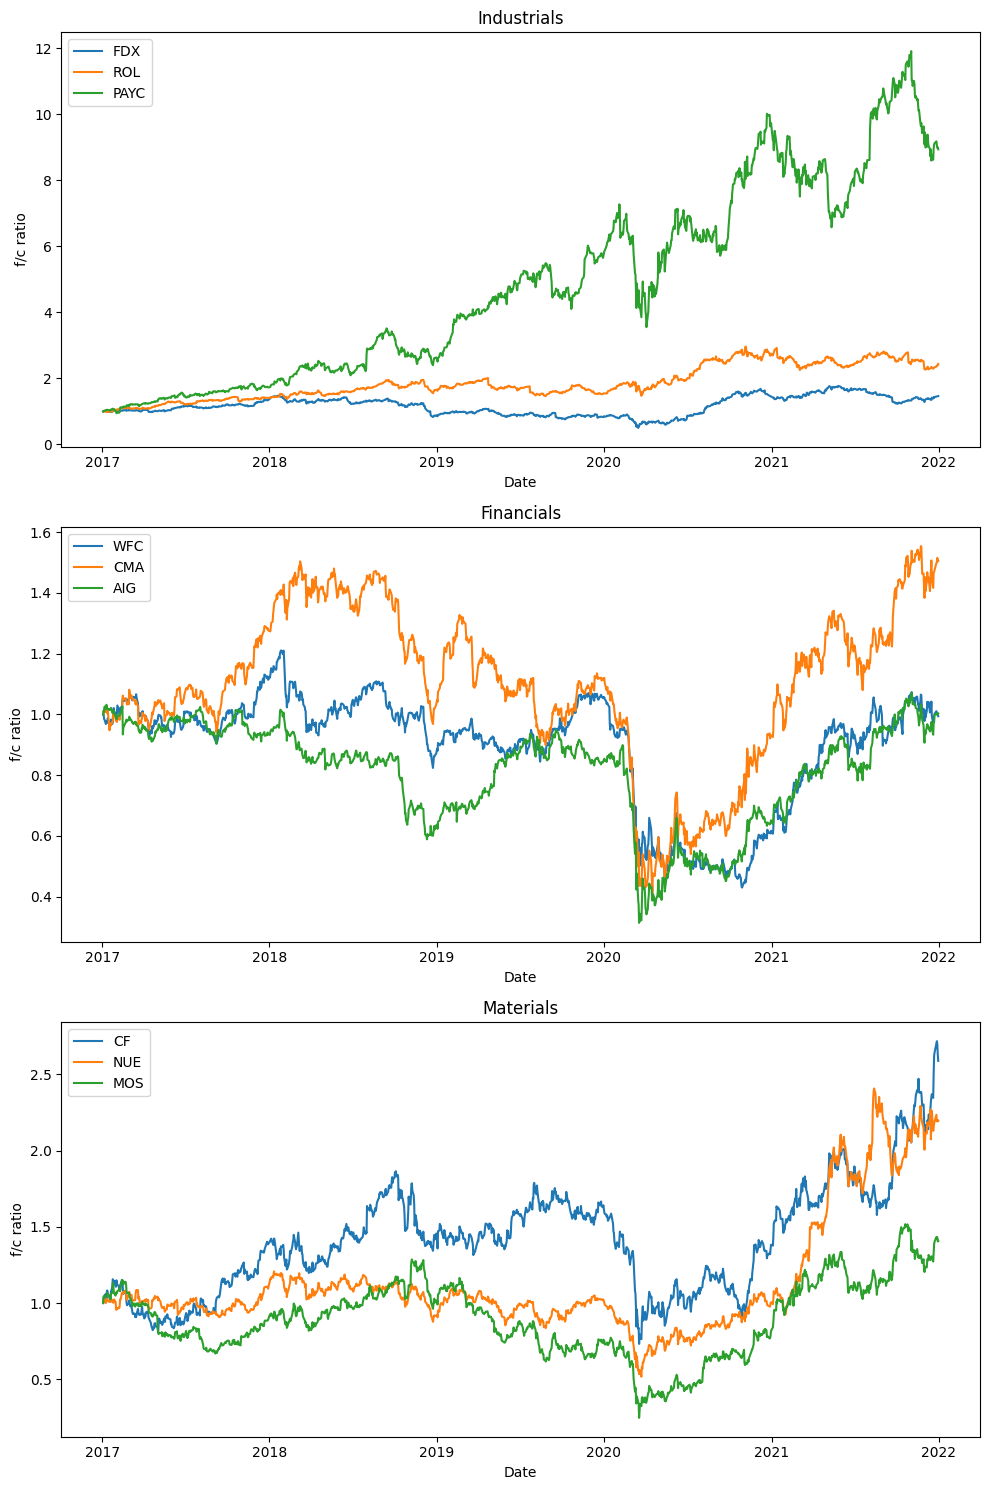

In [ ]:
# Calculate the f/c ratio
stock_data = concatenated_df[concatenated_df['Date'] <= '2021-12-31'].reset_index(drop = True)
# Calculate the f/c ratio
stocks = stock_data.columns.values[1:]
for stock in stocks:
    stock_data[stock] = stock_data[stock] / stock_data[stock].iloc[0]

# Plot the f/c ratio for each stock
fig, axs = plt.subplots(3, figsize=(10, 15))

sectors = ['Industrials', 'Financials', 'Materials']
stocks_per_sector = [top_industrials_tickers, top_financials_tickers, top_materials_tickers]

for i, (sector, stocks) in enumerate(zip(sectors, stocks_per_sector)):
    axs[i].plot(stock_data['Date'], stock_data[stocks])
    axs[i].set_title(sector)
    axs[i].set_ylabel('f/c ratio')
    axs[i].set_xlabel('Date')
    axs[i].legend(stocks, loc='upper left')

plt.tight_layout()
plt.show()

1. For the Financials and materials plots we can observe a dip in year 2020 which may be due to impact of covid and later we can observe an upward trend in each of these stocks.
2. For the Industrials sector, we can see that there is an increase in stock PAYC after 2019, and stocks like FDX and ROL doesnot have much fluctuations. So, these stocks may offer more predictable performance over time, potentially reducing the risk associated with market volatility.

In [ ]:
stock_data.head()

,Date,FDX,ROL,PAYC,WFC,CMA,AIG,CF,NUE,MOS
0,2017-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2017-01-04,1.005381,1.008958,1.018722,1.000893,1.008411,1.013053,1.036712,1.027512,1.043346
2,2017-01-05,1.003782,1.003882,1.011405,0.985357,1.008411,1.007371,1.037025,1.021641,1.045377
3,2017-01-06,1.013585,0.998507,1.021950,0.982857,1.018997,1.025952,1.050204,1.011408,1.043007
4,2017-01-09,1.010602,0.989250,1.041532,0.968572,1.008411,1.019349,1.059617,1.000503,1.039959


#**STATISTICAL ANALYSIS**



Selecting the dataframe from January 01 2017 to December 31 2021 for training dataset to perfom statistical analysis on stocks. Deriving the average,  standard deviation indexes and percentage change from pervious day to identify the stocks variations from their mean values.

In [ ]:
# Select Train Dates From Jan 01 2017 to Dec 31 2021
selected_dates_df = concatenated_df[concatenated_df['Date'] <= '2021-12-31']

In [ ]:
# Mean and Standard Deviation of each stock's return
selected_stocks_data = selected_dates_df.set_index('Date')
Avg_Return = np.mean(selected_stocks_data)
print("Average Return: ",Avg_Return)
Std_Dev_Return = np.std(selected_stocks_data)
print("Std_Dev_Return:")
print(Std_Dev_Return)

Average Return:  78.25767921149473
Std_Dev_Return:
FDX      46.649767
ROL       6.867995
PAYC    133.517259
WFC       8.332489
CMA      13.259280
AIG       8.893953
CF        9.276513
NUE      19.193424
MOS       6.561369
dtype: float64


From the above analysis, we can say that PAYC, FDX, NUE stocks have higher standard deviation, which means they can be identified as risker stocks as they have high deviation values from the standard mean. ROL, MOS can be considered as safe stocks.

In [ ]:
# Percentage change(pct_change) calculation
pct_data = pd.DataFrame()
for i in selected_stocks_data.columns.values:
  pct_data[i] = selected_stocks_data[i].pct_change()
# Drop the null values in the dataset
pct_data.dropna(inplace=True)
pct_data.head()

,FDX,ROL,PAYC,WFC,CMA,AIG,CF,NUE,MOS
Date,,,,,,,,,
2017-01-04,0.005381,0.008958,0.018722,0.000893,0.008411,0.013053,0.036712,0.027512,0.043346
2017-01-05,-0.001590,-0.005031,-0.007182,-0.015522,0.000000,-0.005609,0.000303,-0.005714,0.001947
2017-01-06,0.009766,-0.005354,0.010425,-0.002537,0.010497,0.018445,0.012708,-0.010016,-0.002268
2017-01-09,-0.002943,-0.009270,0.019162,-0.014535,-0.010388,-0.006436,0.008963,-0.010781,-0.002922
2017-01-10,-0.006695,-0.000604,-0.003926,0.007006,0.001007,0.012353,-0.030797,0.026492,0.000326


The above table shows the percentange variation from the previous day.

In [ ]:
# Get Covariance Matrix from Percentage Change Data
cov_matrix = pct_data.cov()
cov_matrix.head(10)

,FDX,ROL,PAYC,WFC,CMA,AIG,CF,NUE,MOS
FDX,0.000446,0.000129,0.000220,0.000231,0.000265,0.000240,0.000231,0.000259,0.000284
ROL,0.000129,0.000275,0.000187,0.000106,0.000097,0.000103,0.000107,0.000118,0.000130
PAYC,0.000220,0.000187,0.000759,0.000243,0.000267,0.000264,0.000246,0.000185,0.000244
WFC,0.000231,0.000106,0.000243,0.000489,0.000460,0.000368,0.000289,0.000286,0.000348
CMA,0.000265,0.000097,0.000267,0.000460,0.000691,0.000457,0.000373,0.000361,0.000453
AIG,0.000240,0.000103,0.000264,0.000368,0.000457,0.000580,0.000351,0.000301,0.000391
CF,0.000231,0.000107,0.000246,0.000289,0.000373,0.000351,0.000666,0.000325,0.000567
NUE,0.000259,0.000118,0.000185,0.000286,0.000361,0.000301,0.000325,0.000498,0.000389
MOS,0.000284,0.000130,0.000244,0.000348,0.000453,0.000391,0.000567,0.000389,0.000903


Covariance is key in understanding the relationship between returns of two assets. To reduce risk in our portfolio, we typically seek negative covariances. Currently, our portfolio lacks negative covariances, suggesting that our stocks tend to move in tandem with the market, which is quite common.

In [ ]:
# Correlation Matrix between Selected Stocks
corr_matrix = pct_data.corr()
corr_matrix.head(10)

,FDX,ROL,PAYC,WFC,CMA,AIG,CF,NUE,MOS
FDX,1.000000,0.368635,0.377957,0.494512,0.477346,0.471437,0.424678,0.549525,0.447658
ROL,0.368635,1.000000,0.409399,0.287890,0.221924,0.259044,0.249194,0.317775,0.261134
PAYC,0.377957,0.409399,1.000000,0.398967,0.369143,0.397723,0.345461,0.300503,0.294892
WFC,0.494512,0.287890,0.398967,1.000000,0.791836,0.691388,0.506930,0.580151,0.523080
CMA,0.477346,0.221924,0.369143,0.791836,1.000000,0.720987,0.549784,0.615789,0.573114
AIG,0.471437,0.259044,0.397723,0.691388,0.720987,1.000000,0.565420,0.559855,0.539842
CF,0.424678,0.249194,0.345461,0.506930,0.549784,0.565420,1.000000,0.564844,0.731381
NUE,0.549525,0.317775,0.300503,0.580151,0.615789,0.559855,0.564844,1.000000,0.580702
MOS,0.447658,0.261134,0.294892,0.523080,0.573114,0.539842,0.731381,0.580702,1.000000


The above matrix gives the correlation between stocks.

In [ ]:
# Average Return per Stock
avg_return = pct_data.mean()
print('Average Return Per Stock: \n',avg_return )

Average Return Per Stock: 
 FDX     0.000528
ROL     0.000848
PAYC    0.002120
WFC     0.000241
CMA     0.000674
AIG     0.000296
CF      0.001089
NUE     0.000875
MOS     0.000728
dtype: float64


From the above data stocks PAYC has higher returns when compared to other stocks.

#**OPTIMIZATION MODEL**

 Installing Bonmin for optimization. Bonmin is an open-source solver specifically designed for solving mixed-integer nonlinear programming (MINLP) problems.

In [ ]:
%%capture
import sys
import os

# Install idaes-pse and its extensions if running in Google Colab
if 'google.colab' in sys.modules:
   !pip install idaes-pse --pre
   !idaes get-extensions --to ./bin
   os.environ['PATH'] += ':bin'


# import modules
%matplotlib inline
from pylab import *

# Importing necessary modules
import shutil
import sys
import os.path
from pyomo.environ import *

# Specify the path to the Bonmin solver executable
executable = '/content/bin/bonmin'


##**Portfolio Optimization Model Setup**

In this section, we establish an optimization model to allocate investments across the sectors:

*   Defining variables for the covariance and the mean of stocks.
*   Specifying the Concrete Model.
*   Defining decision variables and the bounds (between 0 and 1).
*   Defining constraints.
*   Defining objective function.











In [ ]:
# Step 2: Define data for stock returns
# Percentage change(pct_change) calculation
returns_df = pct_data.mean()
returns_cov = pct_data.cov()


In [ ]:
print(returns_df)
print(returns_cov.head(10))

FDX     0.000528
ROL     0.000848
PAYC    0.002120
WFC     0.000241
CMA     0.000674
AIG     0.000296
CF      0.001089
NUE     0.000875
MOS     0.000728
dtype: float64
           FDX       ROL      PAYC       WFC       CMA       AIG        CF  \
FDX   0.000446  0.000129  0.000220  0.000231  0.000265  0.000240  0.000231   
ROL   0.000129  0.000275  0.000187  0.000106  0.000097  0.000103  0.000107   
PAYC  0.000220  0.000187  0.000759  0.000243  0.000267  0.000264  0.000246   
WFC   0.000231  0.000106  0.000243  0.000489  0.000460  0.000368  0.000289   
CMA   0.000265  0.000097  0.000267  0.000460  0.000691  0.000457  0.000373   
AIG   0.000240  0.000103  0.000264  0.000368  0.000457  0.000580  0.000351   
CF    0.000231  0.000107  0.000246  0.000289  0.000373  0.000351  0.000666   
NUE   0.000259  0.000118  0.000185  0.000286  0.000361  0.000301  0.000325   
MOS   0.000284  0.000130  0.000244  0.000348  0.000453  0.000391  0.000567   

           NUE       MOS  
FDX   0.000259  0.000284

In [ ]:
# Step 3: Set up the optimization model
m = ConcreteModel()

# Step 4: Define decision variables, constraints, and objective function

# Industrials Sector ['FDX' 'ROL' 'PAYC']
m.FDX = Var(within=NonNegativeReals, bounds=(0,1))
m.ROL = Var(within=NonNegativeReals, bounds=(0,1))
m.PAYC = Var(within=NonNegativeReals, bounds=(0,1))
# Financials sector ['WFC' 'CMA' 'AIG']
m.WFC = Var(within=NonNegativeReals, bounds=(0,1))
m.CMA = Var(within=NonNegativeReals, bounds=(0,1))
m.AIG = Var(within=NonNegativeReals, bounds=(0,1))
# Materials sector ['CF' 'NUE' 'MOS']
m.CF = Var(within=NonNegativeReals, bounds=(0,1))
m.NUE = Var(within=NonNegativeReals, bounds=(0,1))
m.MOS = Var(within=NonNegativeReals, bounds=(0,1))

# Declaring Binary Decision variables

# Industrials Sector ['FDX' 'ROL' 'PAYC']
m.bFDX = Var(within=Binary, bounds=(0,1))
m.bROL = Var(within=Binary, bounds=(0,1))
m.bPAYC = Var(within=Binary, bounds=(0,1))
# Financials sector ['WFC' 'CMA' 'AIG']
m.bWFC = Var(within=Binary, bounds=(0,1))
m.bCMA = Var(within=Binary, bounds=(0,1))
m.bAIG = Var(within=Binary, bounds=(0,1))
# Materials sector ['CF' 'NUE' 'MOS']
m.bCF = Var(within=Binary, bounds=(0,1))
m.bNUE = Var(within=Binary, bounds=(0,1))
m.bMOS = Var(within=Binary, bounds=(0,1))

# 1. Constraints: Sum of all proportions = 1
m.sum_proportions = Constraint(expr = m.FDX + m.ROL + m.PAYC + m.WFC + m.CMA + m.AIG + m.CF + m.NUE + m.MOS == 1)

# Constraints: Minimum allocation of 2% for each stock else allocating value of stocks to zero
m.constraint_FDX = Constraint(expr = m.FDX >= m.bFDX*0.02)
m.constraint_ROL = Constraint(expr = m.ROL >= m.bROL*0.02)
m.constraint_PAYC = Constraint(expr = m.PAYC >= m.bPAYC*0.02)
m.constraint_WFC = Constraint(expr = m.WFC >= m.bWFC*0.02)
m.constraint_CMA = Constraint(expr = m.CMA >= m.bCMA*0.02)
m.constraint_AIG = Constraint(expr = m.AIG >= m.bAIG*0.02)
m.constraint_CF = Constraint(expr = m.CF >= m.bCF*0.02)
m.constraint_NUE = Constraint(expr = m.NUE >= m.bNUE*0.02)
m.constraint_MOS = Constraint(expr = m.MOS >= m.bMOS*0.02)


# Constrainsts: Choose Atleast 1 Stock Per Sector

m.proportion_1  = Constraint(expr = m.bFDX + m.bROL + m.bPAYC >=1)
m.proportion_2 = Constraint(expr = m.bWFC + m.bCMA + m.bAIG >=1)
m.proportion_3 = Constraint(expr = m.bCF + m.bNUE + m.bMOS >=1)

# Constraints: Dummy Risk
m.total_risk = Constraint(expr = m.FDX >= 0.0)

# Declare objective
m.objective = Objective(expr =
                        m.bFDX*m.FDX*returns_df[0] +
                        m.bROL*m.ROL*returns_df[1] +
                        m.bPAYC*m.PAYC*returns_df[2] +
                        m.bWFC*m.WFC*returns_df[3] +
                        m.bCMA*m.CMA*returns_df[4] +
                        m.bAIG*m.AIG*returns_df[5] +
                        m.bCF*m.CF*returns_df[6] +
                        m.bNUE*m.NUE*returns_df[7] +
                        m.bMOS*m.MOS*returns_df[8],
                        sense=maximize)

In [ ]:
m.pprint()

18 Var Declarations
    AIG : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :     1 : False :  True : NonNegativeReals
    CF : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :     1 : False :  True : NonNegativeReals
    CMA : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :     1 : False :  True : NonNegativeReals
    FDX : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :     1 : False :  True : NonNegativeReals
    MOS : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :     1 : False :  True : NonNegativeReals
    NUE : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :     1 : False :  True : NonNegativeReals
   

##**Calculating Risk**

Calculating the portfolio risk to ensure that investment strategy aligns with the risk tolerance. By considering the covariance between stock returns, we quantify the potential variability in portfolio performance, allowing us to set a maximum risk threshold and optimize our investment allocation accordingly.

In [ ]:
# Creating calculations table for calculate the risk
# Tickers List = ['FDX', 'ROL', 'PAYC', 'WFC', 'CMA', 'AIG', 'CF', 'NUE', 'MOS']
# Defining the function to calculate the risk
def calc_risk(m):
  # Extracting decision variables and tickers list
  variables = [m.FDX, m.ROL, m.PAYC, m.WFC, m.CMA, m.AIG, m.CF, m.NUE, m.MOS]
  tickers_list = top_industrials_tickers + top_financials_tickers + top_materials_tickers

  # Initializing risk expression
  risk_exp = 0

  # Calculating risk using covariance matrix
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*returns_cov.at[tickers_list[i],tickers_list[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

# Setting the maximum risk threshold
max_risk = 0.0008

# Generating sequence of risk levels
risk_limits = np.arange(0.00001, max_risk, 0.000002) # taking tiny steps
print(risk_limits, len(risk_limits))

[1.00e-05 1.20e-05 1.40e-05 1.60e-05 1.80e-05 2.00e-05 2.20e-05 2.40e-05
 2.60e-05 2.80e-05 3.00e-05 3.20e-05 3.40e-05 3.60e-05 3.80e-05 4.00e-05
 4.20e-05 4.40e-05 4.60e-05 4.80e-05 5.00e-05 5.20e-05 5.40e-05 5.60e-05
 5.80e-05 6.00e-05 6.20e-05 6.40e-05 6.60e-05 6.80e-05 7.00e-05 7.20e-05
 7.40e-05 7.60e-05 7.80e-05 8.00e-05 8.20e-05 8.40e-05 8.60e-05 8.80e-05
 9.00e-05 9.20e-05 9.40e-05 9.60e-05 9.80e-05 1.00e-04 1.02e-04 1.04e-04
 1.06e-04 1.08e-04 1.10e-04 1.12e-04 1.14e-04 1.16e-04 1.18e-04 1.20e-04
 1.22e-04 1.24e-04 1.26e-04 1.28e-04 1.30e-04 1.32e-04 1.34e-04 1.36e-04
 1.38e-04 1.40e-04 1.42e-04 1.44e-04 1.46e-04 1.48e-04 1.50e-04 1.52e-04
 1.54e-04 1.56e-04 1.58e-04 1.60e-04 1.62e-04 1.64e-04 1.66e-04 1.68e-04
 1.70e-04 1.72e-04 1.74e-04 1.76e-04 1.78e-04 1.80e-04 1.82e-04 1.84e-04
 1.86e-04 1.88e-04 1.90e-04 1.92e-04 1.94e-04 1.96e-04 1.98e-04 2.00e-04
 2.02e-04 2.04e-04 2.06e-04 2.08e-04 2.10e-04 2.12e-04 2.14e-04 2.16e-04
 2.18e-04 2.20e-04 2.22e-04 2.24e-04 2.26e-04 2.28e

##**Model Output**

In [ ]:
# Tickers List = ['FDX', 'ROL', 'PAYC', 'WFC', 'CMA', 'AIG', 'CF', 'NUE', 'MOS']
# Updating risk contraint for each limit and then solving the problem
parameter_analysis = {} # key=risk, value =stock allocations
returns = {} # key=risk, value = return
infeasible_risks = []  # store infeasible risk values
#for r in [10]:
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  # Calculate Risk
  m.total_risk = Constraint(expr = expr_risk <= r)
  # Run solver
  result = SolverFactory('bonmin', executable='/content/bin/bonmin').solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition != TerminationCondition.optimal:
    infeasible_risks.append(r)
    continue

  result = result.write()

  # Store our allocation proportions
  parameter_analysis[r] = [m.FDX(), m.ROL(), m.PAYC(), m.WFC(), m.CMA(), m.AIG(), m.CF(), m.NUE(), m.MOS()]
  # Store our returns
  returns[r] =  m.FDX()*returns_df[0] + m.ROL()*returns_df[1] + m.PAYC()*returns_df[2] + m.WFC()*returns_df[3] + m.CMA()*returns_df[4] + m.AIG()*returns_df[5] + m.CF()*returns_df[6] + m.NUE()*returns_df[7] + m.MOS()*returns_df[8]
# Remove Infeasible Risks from Risk Limits
risk_limits = risk_limits[~np.isin(risk_limits, infeasible_risks)]

  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\x3a Infeasible problem
  - termination condition: infeasible
  - message from solver: bonmin\

Streaming output truncated to the last 5000 lines.
- Status: ok
  Message: bonmin\x3a Optimal
  Termination condition: optimal
  Id: 3
  Error rc: 0
  Time: 0.047510623931884766
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 0
  Number of variables: 18
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# --------------------------------------------

In this step, the risk constraint is iteratively updated for each specified limit, and the optimization problem is solved to find the optimal allocation of investments. New constraints are set based on each risk limit, and the Bonmin solver is used to find feasible solutions. If the solution is feasible, allocation proportions and corresponding returns are stored for analysis. Any infeasible risk values are identified and excluded from further analysis.

In [ ]:
print("Infeasible Risk Values:", infeasible_risks)

Infeasible Risk Values: [1e-05, 1.2e-05, 1.4e-05, 1.6e-05, 1.7999999999999997e-05, 1.9999999999999998e-05, 2.2e-05, 2.3999999999999997e-05, 2.5999999999999995e-05, 2.7999999999999996e-05, 2.9999999999999997e-05, 3.199999999999999e-05, 3.399999999999999e-05, 3.5999999999999994e-05, 3.7999999999999995e-05, 3.999999999999999e-05, 4.199999999999999e-05, 4.399999999999999e-05, 4.599999999999999e-05, 4.799999999999999e-05, 4.999999999999999e-05, 5.199999999999999e-05, 5.3999999999999984e-05, 5.5999999999999986e-05, 5.799999999999999e-05, 5.999999999999999e-05, 6.199999999999999e-05, 6.399999999999998e-05, 6.599999999999999e-05, 6.799999999999999e-05, 6.999999999999998e-05, 7.199999999999999e-05, 7.399999999999998e-05, 7.599999999999998e-05, 7.799999999999999e-05, 7.999999999999998e-05, 8.199999999999999e-05, 8.399999999999998e-05, 8.599999999999998e-05, 8.799999999999998e-05, 8.999999999999998e-05, 9.199999999999997e-05, 9.399999999999998e-05, 9.599999999999998e-05, 9.799999999999997e-05, 9.

Above are the listed infeasible risk values in the model.

##**Stock Allocation with respect to Different Risk Levels**

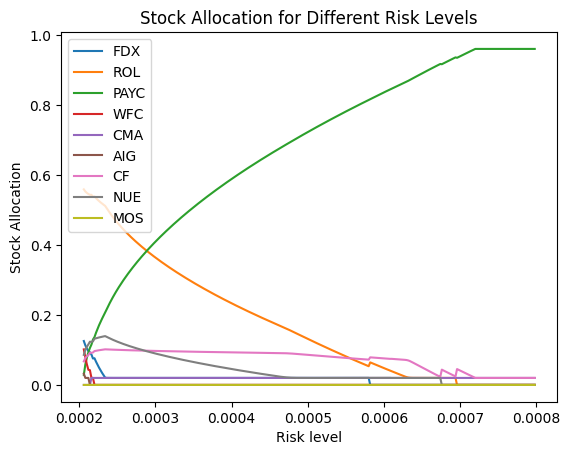

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(parameter_analysis,orient ='index', columns=pct_data.columns.values)
# Visualizing optimal stock allocations across various risk levels
param_analysis.plot()
#plt.axvline(x=0.00045, color='b', linestyle='dotted', label='Chosen portfolio risk')
plt.title('Stock Allocation for Different Risk Levels')
plt.legend(loc='upper left')  # Positioning the legend
plt.xlabel('Risk level')
plt.ylabel('Stock Allocation')
plt.show()  # Displaying the plot

In [ ]:
param_analysis.head()

,FDX,ROL,PAYC,WFC,CMA,AIG,CF,NUE,MOS
0.000206,0.125451,0.558766,0.028850,0.101558,3.928202e-09,3.217372e-02,0.067315,0.085888,0.000000e+00
0.000208,0.113022,0.552741,0.058485,0.078523,1.196972e-08,2.000520e-02,0.076856,0.100368,0.000000e+00
0.000210,0.103911,0.548675,0.077920,0.058781,1.598072e-08,2.000034e-02,0.081640,0.109072,7.684753e-10
0.000212,0.096699,0.545443,0.093288,0.043167,1.863128e-05,2.004225e-02,0.085404,0.115930,8.281087e-06
0.000214,0.093307,0.543156,0.105672,0.042211,1.918294e-08,4.784456e-08,0.092165,0.123488,2.576155e-09


Next we will take a look at risk (X) vs return (Y) of the efficient frontliner.

In [ ]:
# Create Subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.00020599999999999994, 0.00020799999999999996, 0.00020999999999999995, 0.00021199999999999995, 0.00021399999999999994, 0.00021599999999999994, 0.00021799999999999996, 0.00021999999999999995, 0.00022199999999999995, 0.00022399999999999994, 0.00022599999999999994, 0.00022799999999999993, 0.00022999999999999995, 0.00023199999999999995, 0.00023399999999999994, 0.00023599999999999994, 0.00023799999999999993, 0.00023999999999999995, 0.00024199999999999995, 0.00024399999999999994, 0.00024599999999999996, 0.00024799999999999996, 0.00024999999999999995, 0.00025199999999999995, 0.00025399999999999994, 0.000256, 0.000258, 0.00026, 0.00026199999999999997, 0.00026399999999999997, 0.00026599999999999996, 0.00026799999999999995, 0.00026999999999999995, 0.00027199999999999994, 0.00027399999999999994, 0.00027599999999999993, 0.000278, 0.00028, 0.00028199999999999997, 0.00028399999999999996, 0.00028599999999999996, 0.00028799999999999995, 0.00028999999999999995, 0.00029199999999999994, 0.0002939999999

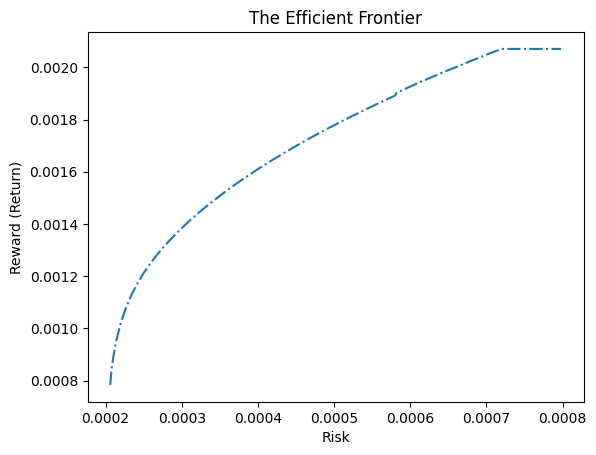

In [ ]:
# Plot Efficient Frontier
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
#legend(loc='upper left')  # Positioning the legend
#plt.axvline(x=0.000425, color='b', linestyle='dotted', label='Chosen Portfolio Risk')  # Marking the chosen risk level
plt.show()


##**Portfolio Selection**

In [ ]:
best_risk = 0
for risk_index, row in param_analysis.iterrows():
    if (row > 0.11).sum() >= 3:
        best_risk = max(best_risk, risk_index)

print(best_risk)

0.00026599999999999996


In [ ]:
from iteround import saferound
closest_index = param_analysis.index.get_indexer([best_risk], method='nearest')
best_risk_index = param_analysis.iloc[closest_index].index
portfolio = param_analysis.iloc[closest_index]
portfolio = np.round(portfolio, 5)
portfolio = portfolio.loc[:, (portfolio > 0).all()]
portfolio

,FDX,ROL,PAYC,CMA,CF,NUE
0.000266,0.02,0.42647,0.32353,0.02,0.09909,0.11091


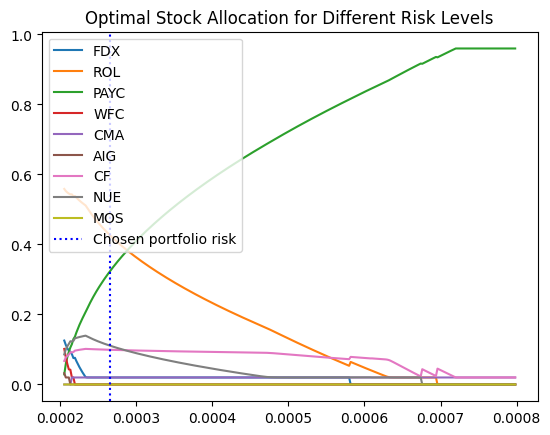

In [ ]:
# Plotting
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.axvline(x=best_risk_index, color='b', linestyle='dotted', label='Chosen portfolio risk')
plt.legend(loc='upper left')
plt.show()

On the left side we can observe lower risk and higher diversity.


On the right side we can observe increased risk and reduced diversity.

The graph indicates that "PAYC" is mostly allocated at a higher risk, suggesting that it is an effective frontliner when it comes to risk-return trade-offs or greater risk investments.

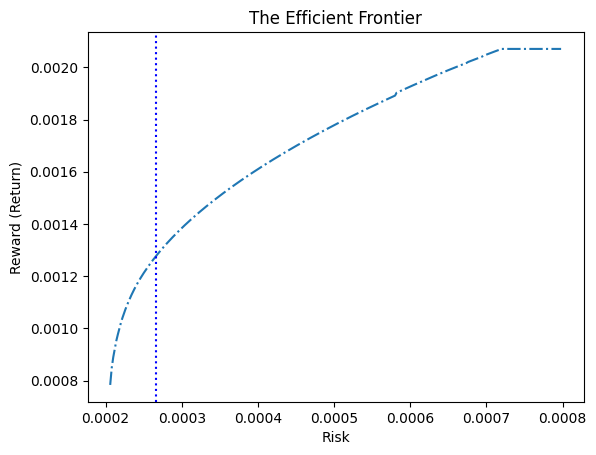

In [ ]:
# Plot Efficient Frontier
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.axvline(x= best_risk_index, color='b', linestyle='dotted', label='Chosen Portfolio Risk')  # Marking the chosen risk level
plt.show()  # Displaying the plot

Effective frontliner shows that greater risk does not equate to greater rewards. At ~Risk = 0.00026, this happens, providing a maximum return of about 0.13%. From this point on, we are increasing our risk with each additional unit of return.

In [ ]:
print("Total Allocation Sum:", sum(portfolio.iloc[0]))

Total Allocation Sum: 1.0


In [ ]:
selected_stocks = selected_stocks_data.columns.values
for i in selected_stocks:
  if i in portfolio.columns.values:
    print(f"Allocation Percentage for {i}: is {portfolio[i].iloc[0] *100}%")
  else:
    print(f"Allocation Percentage for {i}: is 0%")


Allocation Percentage for FDX: is 2.0%
Allocation Percentage for ROL: is 42.647%
Allocation Percentage for PAYC: is 32.353%
Allocation Percentage for WFC: is 0%
Allocation Percentage for CMA: is 2.0%
Allocation Percentage for AIG: is 0%
Allocation Percentage for CF: is 9.908999999999999%
Allocation Percentage for NUE: is 11.091%
Allocation Percentage for MOS: is 0%


In [ ]:
portfolio_tickers = portfolio.columns.values  # Extracting tickers from the portfolio

# Retrieving historical daily price data for each stock in the portfolio for 2022
portfolio_prices = {ticker: si.get_data(ticker, start_date='01/01/2022', end_date='12/31/2022', interval='1d') for ticker in portfolio_tickers}

# Displaying the retrieved price data
portfolio_prices

{'FDX':                   open        high         low       close    adjclose  \
 2022-01-03  259.799988  261.690002  256.959991  258.549988  246.804459   
 2022-01-04  259.649994  265.940002  259.309998  264.910004  252.875565   
 2022-01-05  265.000000  266.790009  261.859985  262.130005  250.221863   
 2022-01-06  261.989990  265.010010  260.130005  263.190002  251.233673   
 2022-01-07  262.690002  266.609985  262.040009  263.989990  251.997330   
 ...                ...         ...         ...         ...         ...   
 2022-12-23  175.710007  179.059998  175.509995  175.929993  171.438385   
 2022-12-27  175.720001  177.990005  175.100006  177.050003  172.529800   
 2022-12-28  177.139999  177.610001  173.020004  173.050003  168.631912   
 2022-12-29  173.839996  176.869995  173.610001  175.550003  171.068115   
 2022-12-30  173.929993  175.160004  171.550003  173.199997  168.778091   
 
              volume ticker  
 2022-01-03  1752400    FDX  
 2022-01-04  2586600    FDX  
 

In [ ]:
# Aggregating adjusted close prices from each ticker in the portfolio
portfolio_data = pd.DataFrame()
for i in portfolio_tickers:
    portfolio_data[i] = pd.DataFrame(portfolio_prices[i]['adjclose'])

# Displaying the first few rows of the aggregated data
portfolio_data.head()

,FDX,ROL,PAYC,CMA,CF,NUE
2022-01-03,246.804459,32.619949,402.181061,79.201874,67.623260,109.463524
2022-01-04,252.875565,32.901497,389.200073,82.589470,68.140579,113.366020
2022-01-05,250.221863,31.940378,358.480835,82.535843,66.071358,118.837257
2022-01-06,251.233673,32.571411,354.398865,86.245216,66.330009,112.910881
2022-01-07,251.997330,32.707329,353.375854,86.763634,66.234215,110.819237


#**BUY & HOLD STRATEGY**

###**Buy & Hold Strategy for MPT Portfolio Allocation**

Calculating how much money to invest in each stock of the portfolio, making sure to spread out the investment evenly according to the MPT allocation. Then, we are printing out the allocated amounts for each stock, ensuring a balanced investment strategy.

In [ ]:
# Creating a list of initial investment amounts for each portfolio component, scaled by 100,000
investment = list(100000 * portfolio.iloc[0])
for i in range(len(portfolio.columns.values)):
  print(f"Amount Allocated {portfolio.columns.values[i]} is ${investment[i]} ")

Amount Allocated FDX is $2000.0 
Amount Allocated ROL is $42647.0 
Amount Allocated PAYC is $32353.0 
Amount Allocated CMA is $2000.0 
Amount Allocated CF is $9909.0 
Amount Allocated NUE is $11091.0 


Calculating the investment amounts for each stock in the portfolio based on their price changes. Adjusting missing data on the first trading day of 2022 and updating the total portfolio investment by summing individual investments for each stock.

In [ ]:
# Initializing total investment in the portfolio to zero
portfolio_data['Total_investment'] = 0

for i in portfolio_tickers:
  # Calculating and adjusting investment amounts for each ticker
  portfolio_data[i + '_invested_amt'] = np.log(portfolio_data[i]).diff()
  portfolio_data.loc['2022-01-03', i + '_invested_amt'] = 0
  portfolio_data[i + '_invested_amt'] = np.exp(portfolio_data[i + '_invested_amt']).cumprod() * investment[list(portfolio_tickers).index(i)]

  # Summing individual investments to update total portfolio investment
  portfolio_data['Total_investment'] += portfolio_data[i + '_invested_amt']

# Previewing updated portfolio data
portfolio_data.head(10)

,FDX,ROL,PAYC,CMA,CF,NUE,Total_investment,FDX_invested_amt,ROL_invested_amt,PAYC_invested_amt,CMA_invested_amt,CF_invested_amt,NUE_invested_amt
2022-01-03,246.804459,32.619949,402.181061,79.201874,67.623260,109.463524,100000.000000,2000.000000,42647.000000,32353.000000,2000.000000,9909.000000,11091.000000
2022-01-04,252.875565,32.901497,389.200073,82.589470,68.140579,113.366020,99929.803122,2049.197701,43015.092485,31308.759156,2085.543333,9984.803965,11486.406482
2022-01-05,250.221863,31.940378,358.480835,82.535843,66.071358,118.837257,96430.358510,2027.693213,41758.535380,28837.584820,2084.189147,9681.595932,12040.760019
2022-01-06,251.233673,32.571411,354.398865,86.245216,66.330009,112.910881,96466.295383,2035.892500,42583.541626,28509.215348,2177.857979,9719.496796,11440.291135
2022-01-07,251.997330,32.707329,353.375854,86.763634,66.234215,110.819237,96355.011884,2042.080853,42761.239038,28426.920447,2190.949016,9705.459770,11228.362759
2022-01-10,244.895309,32.794704,361.539825,86.808334,64.634392,108.320854,96581.998699,1984.529054,42875.473089,29083.661845,2192.077793,9471.033835,10975.223082
2022-01-11,243.931198,32.619949,364.698181,87.013893,66.253365,107.333122,96742.127553,1976.716300,42647.000000,29337.732194,2197.268549,9708.265834,10875.144677
2022-01-12,244.570786,32.882080,355.630371,87.916672,65.046326,111.090370,96587.184209,1981.899248,42989.707140,28608.282482,2220.065449,9531.395506,11255.834383
2022-01-13,245.964478,32.522869,340.216064,88.292076,62.823830,109.153648,94376.443340,1993.193145,42520.078264,27368.296040,2229.545133,9205.727784,11059.602975
2022-01-14,244.580322,31.658833,331.714386,90.490891,63.647690,107.313751,92541.511482,1981.976530,41390.445388,26684.388143,2285.069435,9326.450008,10873.181977


In [ ]:
fc_values = pd.DataFrame()
# calculate percentual return for each stock, f/c Values
fc_values['FDX_Return'] = ((portfolio_data['FDX']) / portfolio_data['FDX'].iloc[0])
fc_values['ROL_Return'] = ((portfolio_data['ROL']) / portfolio_data['ROL'].iloc[0])
fc_values['PAYC_Return'] = ((portfolio_data['PAYC'] ) / portfolio_data['PAYC'].iloc[0])
fc_values['CMA_Return'] = ((portfolio_data['CMA']) / portfolio_data['CMA'].iloc[0])
fc_values['CF_Return'] = ((portfolio_data['CF'] ) / portfolio_data['CF'].iloc[0])
fc_values['NUE_Return'] = ((portfolio_data['NUE']) / portfolio_data['NUE'].iloc[0])

In [ ]:
fc_values.head()

,FDX_Return,ROL_Return,PAYC_Return,CMA_Return,CF_Return,NUE_Return
2022-01-03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2022-01-04,1.024599,1.008631,0.967724,1.042772,1.007650,1.035651
2022-01-05,1.013847,0.979167,0.891342,1.042095,0.977051,1.085633
2022-01-06,1.017946,0.998512,0.881192,1.088929,0.980876,1.031493
2022-01-07,1.021040,1.002679,0.878649,1.095475,0.979459,1.012385


In [ ]:
fc_values.mean()

FDX_Return     0.803471
ROL_Return     1.061926
PAYC_Return    0.801406
CMA_Return     0.923346
CF_Return      1.347398
NUE_Return     1.155851
dtype: float64

In [ ]:
merged_data = pd.concat([industrials_transformed, financials_transformed, materials_transformed], join = "inner", axis =0)
merged_portfolio_data = merged_data.loc[merged_data['Symbol'].isin(portfolio_tickers)]
table = merged_portfolio_data[['Symbol']]
table['Average f/c'] = fc_values.mean().values.copy()
table.head(10)

<ipython-input-366-f7f591a8deff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Average f/c'] = fc_values.mean().values.copy()


,Symbol,Average f/c
25,FDX,0.803471
51,PAYC,1.061926
58,ROL,0.801406
23,CMA,0.923346
7,CF,1.347398
20,NUE,1.155851


We're creating a new column called "Invested Amount," which contains the corresponding investment amounts for each stock derived earlier based on the MPT allocation.

In [ ]:
# Create a new column "Invested Amount" and insert values
invested_amounts = {}
for i in range(len(portfolio.columns.values)):
    symbol = portfolio.columns.values[i]
    amount = investment[i]
    invested_amounts[symbol] = amount
table.insert(1, "Invested Amount", table["Symbol"].map(invested_amounts))
table.head(10)

,Symbol,Invested Amount,Average f/c
25,FDX,2000.0,0.803471
51,PAYC,32353.0,1.061926
58,ROL,42647.0,0.801406
23,CMA,2000.0,0.923346
7,CF,9909.0,1.347398
20,NUE,11091.0,1.155851


Retrieving the last day's data from the portfolio data and calculating the aggregate value of the portfolio. Then, inserting this aggregate value into the table as a new column named "Aggregate Value" to track the overall value of the portfolio.

In [ ]:
last_day = portfolio_data.iloc[-1]
table.insert(2, "Aggregate Final Value", last_day.iloc[-(len(portfolio.columns.values)):].values)
table.head(10)

,Symbol,Invested Amount,Aggregate Value,Average f/c
25,FDX,2000.0,1367.706989,0.803471
51,PAYC,32353.0,46937.911241,1.061926
58,ROL,42647.0,24792.459734,0.801406
23,CMA,2000.0,1563.409943,0.923346
7,CF,9909.0,12150.253340,1.347398
20,NUE,11091.0,13147.325051,1.155851


In [ ]:
# Convert the index to datetime format
portfolio_data.index = pd.to_datetime(portfolio_data.index)
# Filter the rows where the row date is the last day of each month
# Get the last row of each month
last_days_of_month = portfolio_data.resample('M').last()
# Add 1st Trading Day of the Year
new_row = portfolio_data.iloc[0].copy()
last_days_of_month

,FDX,ROL,PAYC,CMA,CF,NUE,Total_investment,FDX_invested_amt,ROL_invested_amt,PAYC_invested_amt,CMA_invested_amt,CF_invested_amt,NUE_invested_amt
2022-01-31,234.690964,29.950165,333.015503,82.929131,65.975563,98.191803,89558.054876,1901.837309,39156.550020,26789.055022,2094.120419,9667.558906,9948.933201
2022-02-28,212.172653,31.782761,336.898895,85.351379,78.083031,127.455658,96884.247133,1719.358349,41552.467725,27101.450121,2155.286872,11441.695439,12913.988628
2022-03-31,221.629379,34.139927,344.020050,81.457794,99.116104,144.426666,105318.702995,1795.991697,44634.203681,27674.303353,2056.966339,14523.722585,14633.515339
2022-04-30,190.356644,32.669132,279.552277,73.774117,93.124519,150.382523,97487.809103,1542.570541,42711.301228,22488.266323,1862.938665,13645.761169,15236.971176
2022-05-31,215.106628,34.641075,282.402710,74.954147,95.377075,128.696655,98658.398776,1743.134055,45289.399926,22717.566206,1892.736719,13975.833628,13039.728242
2022-06-30,218.246994,34.113541,278.211487,66.705620,82.785019,101.915550,92890.060033,1768.582263,44599.706544,22380.408006,1684.445497,12130.689151,10326.228571
2022-07-31,224.388824,37.679253,328.238281,70.696304,92.209755,132.555603,106212.251948,1818.353086,49261.483207,26404.756834,1785.217974,13511.718527,13430.722320
2022-08-31,202.940521,33.067856,348.807159,72.996201,100.297874,129.763962,102624.584791,1644.545017,43232.588532,28059.396946,1843.294788,14696.890251,13147.869257
2022-09-30,143.711639,33.969002,327.741699,65.173119,93.308235,104.924583,97889.663126,1164.578956,44410.737839,26364.809854,1645.746887,13672.681493,10631.108097
2022-10-31,155.143127,41.217293,343.642609,64.623146,103.012291,128.843735,112569.367303,1257.214949,53887.082014,27643.940507,1631.859020,15094.640270,13054.630543


In [ ]:
pd.options.mode.copy_on_write = False
# Calculate the total value of the portfolio on January 31st, 2022, Get 1st Row of Portfolio Data
initial_portfolio_value = portfolio_data.iloc[0]['Total_investment']
# Calculate the total value of the portfolio on the last trading day of each month
monthly_portfolio_values = portfolio_data.resample('M').last()['Total_investment']
# Calculate the percentual return for each month
monthly_returns = ((monthly_portfolio_values - initial_portfolio_value) / initial_portfolio_value)
# Create a list of month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Create a dataframe with month names and monthly return percentages
monthly_returns_df = pd.DataFrame({'Month': month_names,'Monthly Investment Values':monthly_portfolio_values, 'Monthly Return': monthly_returns})
monthly_returns_df['Consecutive Monthly  Return'] = monthly_portfolio_values.pct_change()
monthly_returns_df['Consecutive Monthly  Return'].iloc[0] = monthly_returns_df['Monthly Return'].iloc[0].copy()

<ipython-input-370-ecbd01f2d150>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_returns_df['Consecutive Monthly  Return'].iloc[0] = monthly_returns_df['Monthly Return'].iloc[0].copy()


In [ ]:
monthly_returns_df.head(10)

,Month,Monthly Investment Values,Monthly Return,Consecutive Monthly Return
2022-01-31,January,89558.054876,-0.104419,-0.104419
2022-02-28,February,96884.247133,-0.031158,0.081804
2022-03-31,March,105318.702995,0.053187,0.087057
2022-04-30,April,97487.809103,-0.025122,-0.074354
2022-05-31,May,98658.398776,-0.013416,0.012008
2022-06-30,June,92890.060033,-0.071099,-0.058468
2022-07-31,July,106212.251948,0.062123,0.143419
2022-08-31,August,102624.584791,0.026246,-0.033778
2022-09-30,September,97889.663126,-0.021103,-0.046138
2022-10-31,October,112569.367303,0.125694,0.149962


##### Buy & Hold Strategy Performance for MPT Stock Allocation Strategy

**Volatility**: The strategy experienced significant volatility, with monthly returns ranging from -0.1044 to 0.1257.

**Positive and Negative Months:** There were 5 months with positive returns and 5 months with negative returns.

**Consecutive Monthly Returns:** The strategy experienced both positive and negative consecutive monthly returns, with a maximum consecutive return of 0.149962 and a minimum of -0.074354.

**Cumulative Return:** Over the entire period, the strategy returned 25.67% (from 89558.054876 to 112569.367303).

###**Buy & Hold strategy for the S&P 500 index (^GSPC)**

Retrieving the adjusted close prices of the S&P 500 index to analyze its performance during the specified period. This data allows us to assess how investing in the S&P 500 index would have performed over the given timeframe, facilitating comparisons with other investment strategies.

In [ ]:
# Retrieving adjusted close prices of S&P 500 from 01/01/2022 to 12/31/2022 on a daily interval
sp500 = pd.DataFrame(si.get_data('^GSPC', start_date='01/01/2022', end_date='12/31/2022', interval='1d')['adjclose'])

# Displaying the first few entries of the S&P 500 data for a quick overview
sp500.head()


,adjclose
2022-01-03,4796.560059
2022-01-04,4793.540039
2022-01-05,4700.580078
2022-01-06,4696.049805
2022-01-07,4677.029785


In [ ]:
# Logging close prices and calculating daily returns
sp500['logClose'] = np.log(sp500['adjclose'])
sp500['Return'] = sp500['logClose'].diff()
sp500.iloc[0, 2] = 0.0  # Initializing the first return value
sp500.head()

,adjclose,logClose,Return
2022-01-03,4796.560059,8.475654,0.000000
2022-01-04,4793.540039,8.475024,-0.000630
2022-01-05,4700.580078,8.455441,-0.019583
2022-01-06,4696.049805,8.454477,-0.000964
2022-01-07,4677.029785,8.450419,-0.004058


In [ ]:
# Calculating the cumulative investment value from returns, starting with an initial investment of $100,000
sp500['Investment_Value'] = 100000 * np.exp(sp500['Return']).cumprod()
sp500.head(10)

,adjclose,logClose,Return,Investment_Value
2022-01-03,4796.560059,8.475654,0.000000,100000.000000
2022-01-04,4793.540039,8.475024,-0.000630,99937.037804
2022-01-05,4700.580078,8.455441,-0.019583,97998.983036
2022-01-06,4696.049805,8.454477,-0.000964,97904.534652
2022-01-07,4677.029785,8.450419,-0.004058,97508.000067
2022-01-10,4670.290039,8.448976,-0.001442,97367.487992
2022-01-11,4713.069824,8.458095,0.009118,98259.372689
2022-01-12,4726.350098,8.460909,0.002814,98536.243473
2022-01-13,4659.029785,8.446563,-0.014346,97132.731129
2022-01-14,4662.850098,8.447382,0.000820,97212.378052


In [ ]:
# Calculate the total value of the portfolio on January 31st, 2022, Get 1st Row of Portfolio Data
sp_initial_portfolio_value = sp500.iloc[0]['Investment_Value']
# Calculate the total value of the portfolio on the last trading day of each month
sp_monthly_portfolio_values = sp500.resample('M').last()['Investment_Value']
# Calculate the percentual return for each month
sp_monthly_returns = ((sp_monthly_portfolio_values - sp_initial_portfolio_value) / initial_portfolio_value)
# Create a list of month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Create a dataframe with month names and monthly return percentages
sp_monthly_returns_df = pd.DataFrame({'Month': month_names,'SP_Monthly_Investment_Values':sp_monthly_portfolio_values, 'SP_Monthly Return': sp_monthly_returns})
sp_monthly_returns_df['Consecutive Monthly  Return'] = sp_monthly_portfolio_values.pct_change()
sp_monthly_returns_df['Consecutive Monthly  Return'].iloc[0] = sp_monthly_returns_df['SP_Monthly Return'].iloc[0].copy()
sp_monthly_returns_df.head(10)

<ipython-input-375-53e694f0efa8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_monthly_returns_df['Consecutive Monthly  Return'].iloc[0] = sp_monthly_returns_df['SP_Monthly Return'].iloc[0].copy()


,Month,SP_Monthly_Investment_Values,SP_Monthly Return,Consecutive Monthly Return
2022-01-31,January,94141.421134,-0.058586,-0.058586
2022-02-28,February,91189.099854,-0.088109,-0.031360
2022-03-31,March,94451.233820,-0.055488,0.035773
2022-04-30,April,86143.613867,-0.138564,-0.087957
2022-05-31,May,86148.194787,-0.138518,0.000053
2022-06-30,June,78918.638286,-0.210814,-0.083920
2022-07-31,July,86109.419847,-0.138906,0.091116
2022-08-31,August,82454.925023,-0.175451,-0.042440
2022-09-30,September,74753.991890,-0.252460,-0.093396
2022-10-31,October,80724.100880,-0.192759,0.079863


In [ ]:
compare_df = pd.concat([monthly_returns_df, sp_monthly_returns_df], join = 'inner', axis = 1)
compare_df

,Month,Monthly Investment Values,Monthly Return,Consecutive Monthly Return,Month,SP_Monthly_Investment_Values,SP_Monthly Return,Consecutive Monthly Return
2022-01-31,January,89558.054876,-0.104419,-0.104419,January,94141.421134,-0.058586,-0.058586
2022-02-28,February,96884.247133,-0.031158,0.081804,February,91189.099854,-0.088109,-0.031360
2022-03-31,March,105318.702995,0.053187,0.087057,March,94451.233820,-0.055488,0.035773
2022-04-30,April,97487.809103,-0.025122,-0.074354,April,86143.613867,-0.138564,-0.087957
2022-05-31,May,98658.398776,-0.013416,0.012008,May,86148.194787,-0.138518,0.000053
2022-06-30,June,92890.060033,-0.071099,-0.058468,June,78918.638286,-0.210814,-0.083920
2022-07-31,July,106212.251948,0.062123,0.143419,July,86109.419847,-0.138906,0.091116
2022-08-31,August,102624.584791,0.026246,-0.033778,August,82454.925023,-0.175451,-0.042440
2022-09-30,September,97889.663126,-0.021103,-0.046138,September,74753.991890,-0.252460,-0.093396
2022-10-31,October,112569.367303,0.125694,0.149962,October,80724.100880,-0.192759,0.079863


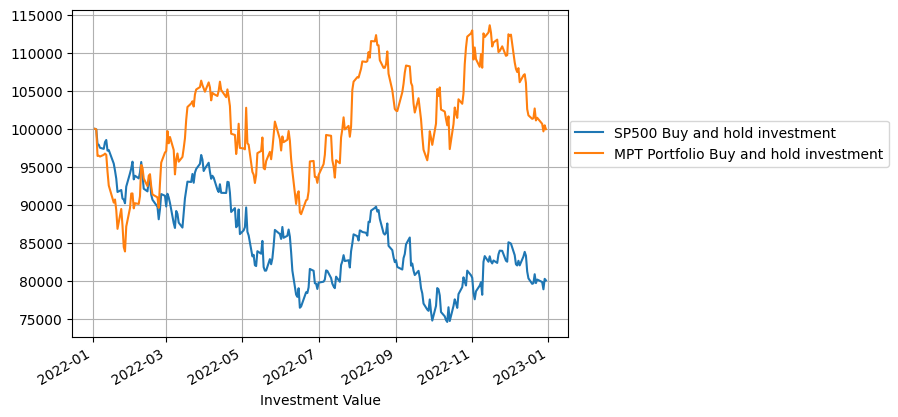

In [ ]:
# Visualize investment trends for S&P 500 Buy and Hold, S&P 500 Momentum Trading, and MPT Portfolio Buy and Hold
lines = sp500['Investment_Value'].plot()

# Include the MPT Portfolio Buy and Hold data in the existing graph for comparison
portfolio_data['Total_investment'].plot()
# Set up a legend for clarity and position it optimally
plt.legend( ['SP500 Buy and hold investment',
             'MPT Portfolio Buy and hold investment'],
             loc = 4,
            bbox_to_anchor=(1.66, 0.5))
plt.xlabel('Date')
plt.xlabel('Investment Value')
# Introduce a grid to enhance readability of the plot
plt.grid()
# Render the plot to display the investment data visually
plt.show()

#### **Comparision of MPT Stock Allocation & SP500 Buy & Hold Strategies**
**Monthly Returns:** The MPT strategy generally outperformed the SP500 Buy & Hold strategy in terms of monthly returns, with an average monthly return of -0.0156% compared to -0.1041% for the SP500.
Consecutive Monthly Returns: The MPT strategy showed more consistent performance, with a maximum consecutive monthly return of 0.149962, while the SP500 had a maximum consecutive monthly return of 0.091116.

**Volatility:** The SP500 Buy & Hold strategy experienced higher volatility, with a standard deviation of monthly returns of 0.1389, compared to 0.0649 for the MPT strategy.

**Cumulative Returns:** Over the entire period, the MPT strategy returned 12.56%, while the SP500 Buy & Hold strategy returned -19.95%.

The MPT stock allocation strategy outperformed the SP500 Buy & Hold strategy in 2022, with more consistent returns, lower volatility, and higher cumulative returns. This suggests that the MPT strategy was more effective in managing risk and maximizing returns over this period. However, it's essential to note that past performance is not a guarantee of future results, and both strategies carry inherent risks and uncertainties.

**Recommendation:**
Investors may consider incorporating MPT principles into their investment approach, diversifying their portfolios, and regularly rebalancing to manage risk. However, it's crucial to consult with a financial advisor and conduct thorough research before making investment decisions.



#**MONTE CARLO SIMULATION**

In [ ]:
allocation = portfolio.iloc[0].values
print(allocation)

[0.02    0.42647 0.32353 0.02    0.09909 0.11091]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

# Define the stocks and their parameters
stocks = portfolio_data.columns.values[:len(allocation)]
# Calculate the daily returns For Dates 2017 - 2021 as used in MPT Model
returns = pct_data[stocks]
# Calculate the mean and standard deviation of the daily returns
mean_return = returns.mean().to_list()
std_return = returns.std().to_list()

# MPT allocation
allocation = portfolio.iloc[0].values

# Define the number of simulations and trading days
num_simulations = 1000
trading_days = 252

# Initialize the results arrays
stock_returns = np.zeros((num_simulations, trading_days, len(stocks)))
portfolio_returns = np.zeros((num_simulations, trading_days))
stock_fc_returns = np.zeros((num_simulations, len(stocks)))
portfolio_fc_returns = np.zeros(num_simulations)

# Run the simulations
for i in range(num_simulations):
  for j in range(trading_days):
    for k, stock in enumerate(stocks):
      stock_returns[i, j, k] = norm.rvs(mean_return[k], std_return[k])
      portfolio_returns[i, j] = np.sum(stock_returns[i, j, :] * allocation)

# Calculate the annual returns
annual_stock_returns = (1 + stock_returns).prod(axis=1) - 1
annual_portfolio_returns = (1 + portfolio_returns).prod(axis=1) - 1

# Calculate the f/c returns
for i in range(num_simulations):
  for k, stock in enumerate(stocks):
    stock_fc_returns[i, k] = (1 + stock_returns[i, :, k]).prod() - 1
  portfolio_fc_returns[i] = (1 + portfolio_returns[i, :]).prod() - 1


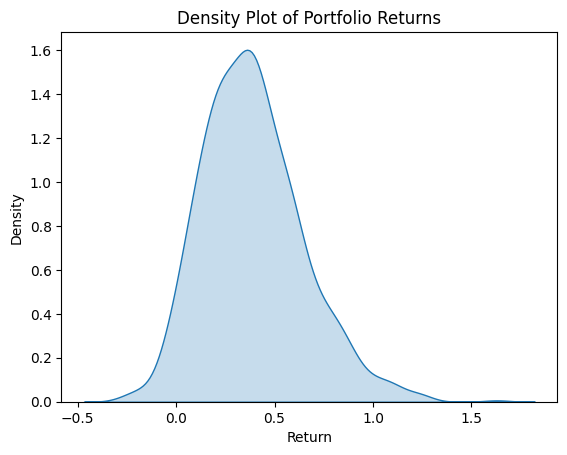

In [ ]:
# Plot the density plot of the portfolio returns
sns.kdeplot(annual_portfolio_returns, fill = True)
plt.xlabel('Return')
plt.ylabel('Density')
plt.title('Density Plot of Portfolio Returns')
plt.show()

Curve here is bit skewed towards left which implies risk of low returns and the peat at  0.5 represents most likely returns.

In [ ]:
# Calculate the probability of losing money
prob_stock_lose_money = (annual_stock_returns < 0).mean(axis=0)
prob_portfolio_lose_money = (annual_portfolio_returns < 0).mean()
prob_df = pd.DataFrame({'Stock': stocks, 'Probability to Lose Money': prob_stock_lose_money}).reset_index(drop = True)
print(prob_df.head(10))
print('Portfolio:', prob_portfolio_lose_money)

In [ ]:
prob_df = pd.DataFrame({'Stock': stocks, 'Probability to Lose Money': prob_stock_lose_money}).reset_index(drop = True)
prob_df.head(10)

,Stock,Probability to Lose Money
0,FDX,0.396
1,ROL,0.237
2,PAYC,0.139
3,CMA,0.405
4,CF,0.323
5,NUE,0.320


Investing in stocks with a high probability of losing money carries a higher risk of loss compared to others in the portfolio.

In [ ]:
print('Probability that Portfolio Loses Money is:', prob_portfolio_lose_money)

Probability that Portfolio Loses Money is: 0.038


##### Based on the Monte Carlo simulation results, we can say that:

**Overall Portfolio Risk:** The probability of the portfolio losing money is relatively low, at 3.8% (0.038). This suggests that the portfolio has a high likelihood of generating positive returns.

**Individual Stock Risk:** The probabilities of each stock losing money vary significantly, ranging from 13.9% (PAYC) to 40.5% (CMA and FDX). This highlights the importance of diversification, as some stocks are more risky than others.

**Diversification Benefits:** The overall portfolio risk is significantly lower than the individual stock risks, demonstrating the benefits of diversification. This is because the portfolio's returns are spread across multiple stocks, reducing the impact of any one stock's potential losses.



#**CONCLUSION**


* Effective investment strategies strive for maximizing returns while minimizing risks, though there's inevitably a balance to strike.

* It's crucial to keep a constant eye on investment strategies to spot underperforming stocks. Strategies should be flexible, allowing for adjustments based on changing market conditions and asset performance.

* Monte Carlo simulations provide forecasts of future stock performance based on historical data. These forecasts can help investors set realistic expectations and develop appropriate investment strategies.

* It is smart to invest in stocks that have positive returns and a low probability of losing money. Based on our analysis investing in "PAYC" stock will have higher returns and lower risk while investing in "FDX" has higher risk to lose money

* Learned how to create effective models that automate in finding stocks that are profitable to invest in with lower risk. Aiming to become as good as David Bergman.

* Based on efficient frontier, we have observed that CMA, PAYC and ROL are the 3 stocks that are better suited to be allocated in the portfolio.

* We learned to integrate optimization solvers like Bonmin into our portfolio optimization. This helped us understand how these tools search for the best solutions, making it easier to find the right investment mix for our needs.
By trying out the Buy-and-Hold strategy for both the MPT portfolio and the S&P 500 index, we learned a lot about long-term investing. which showed us how important it is to choose the right mix of assets and how market changes can affect investment outcomes. Moreover, Comparing these strategies also helped us see the pros and cons of actively managing a portfolio versus simply investing in an index.
